In [1]:
import os
import pandas as pd
import numpy as np
#import scanpy as sc
#import pyranges as pr
import warnings

In [2]:
#import palantir 
#import phenograph
#import harmony

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from tabulate import tabulate
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
# figure size & color
matplotlib.rcParams['figure.dpi'] = 100 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
matplotlib.rcParams['figure.figsize'] = [8, 8] # Square
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "on"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "on"
matplotlib.rcParams['axes.spines.right'] = "off"
warnings.filterwarnings(action="ignore", module="matplotlib", message="findfont")

In [4]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 2 #set the value globally

In [5]:
fig_dir = '/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/Figures/'

# Load data

## ArchR

In [6]:
ds_name = 'DJ_Hs_PBMC_ALLSEQ_220523_220527_79x79_MERGE'
data_dir = os.path.expanduser('/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/ArchR/'+ ds_name + '/export/')

In [7]:
#import raw metadata
ALL_meta = pd.read_csv(data_dir + 'cell_metadata_ALL.csv', index_col=0)
ALL_meta

Sample  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
...                                                                                     ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   

                                                    TSSEnrichment  ReadsInTSS  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...          1.508        1243   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...          1.325        1038   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...          1.412         959   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...          1.134         876   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...          1.269         594   
...                                                           ...         ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...          3.564          36   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...          1.584          16   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...          2.574          26   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...          0.396           4   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...          2.376          24   

                                                    ReadsInPromoter  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...             4057   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...             3465   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...             3462   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...             3541   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...             1912   
...                                                             ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...               35   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...               30   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...               28   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...                8   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...               42   

                                                    ReadsInBlacklist  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...              6584   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...              5883   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...              4069   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...              5230   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...              3754   
...                                                              ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...                 2   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...                 0   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...                22   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...                60   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...                18   

                                                    PromoterRatio  PassQC  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...       0.026904       1   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...       0.030920       1   
DJ_Hs_PBMC_K27me3_ALLS

Load metadata from ArchR

## Souporcell

In [8]:
#import souporcell clusters file
soup_dir = os.path.expanduser('/fh/fast/henikoff_s/user/jgreene/projects/sciCnT/data/DJ_Hs_PBMC_220523_79x79/souporcell/souporcell_DJ_Hs_PBMC_ALLSEQ_220523_220527_79x79_no_dup/')
soup_data = pd.read_csv(soup_dir + 'clusters.tsv', sep='\t', index_col=0)
soup_data

status assignment  log_prob_singleton  \
barcode                                                                         
TAAGGCGAGTAAGGAGATTACTCGTATAGCCT-1  unassigned          1           -0.747190   
TAAGGCGAGTAAGGAGATTACTCGATAGAGGC-1  unassigned        0/1           -0.693147   
TAAGGCGAGTAAGGAGATTACTCGCCTATCCT-1  unassigned          1           -0.732744   
TAAGGCGAGTAAGGAGATTACTCGTTCTCGTA-1  unassigned          1           -0.827166   
TAAGGCGAGTAAGGAGATTACTCGAGGCGAAG-1  unassigned        0/1           -0.693147   
...                                        ...        ...                 ...   
GCGTTAAAACGCGCAGAGCGATAGTTCTCGTA-2  unassigned        0/1           -0.693147   
GCGTTAAAACGCGCAGAGCGATAGAGGCGAAG-2  unassigned        0/1           -0.693147   
GCGTTAAAACGCGCAGAGCGATAGTAATCTTA-2  unassigned        0/1           -0.693147   
GCGTTAAAACGCGCAGAGCGATAGCAGGACGT-2  unassigned        0/1           -0.693147   
GCGTTAAAACGCGCAGAGCGATAGGTACTGAC-2  unassigned        0/1           -0.693147   

                                    log_prob_doublet  cluster0  cluster1  
barcode                                                                   
TAAGGCGAGTAAGGAGATTACTCGTATAGCCT-1         -0.847298 -0.998529 -0.747190  
TAAGGCGAGTAAGGAGATTACTCGATAGAGGC-1         -0.693147 -0.693147 -0.693147  
TAAGGCGAGTAAGGAGATTACTCGCCTATCCT-1         -0.955511 -1.637609 -0.732744  
TAAGGCGAGTAAGGAGATTACTCGTTCTCGTA-1         -0.830137 -0.851841 -0.827166  
TAAGGCGAGTAAGGAGATTACTCGAGGCGAAG-1         -0.693147 -0.693147 -0.693147  
...                                              ...       ...       ...  
GCGTTAAAACGCGCAGAGCGATAGTTCTCGTA-2         -0.693147 -0.693147 -0.693147  
GCGTTAAAACGCGCAGAGCGATAGAGGCGAAG-2         -0.693147 -0.693147 -0.693147  
GCGTTAAAACGCGCAGAGCGATAGTAATCTTA-2         -0.693147 -0.693147 -0.693147  
GCGTTAAAACGCGCAGAGCGATAGCAGGACGT-2         -0.693147 -0.693147 -0.693147  
GCGTTAAAACGCGCAGAGCGATAGGTACTGAC-2         -0.693147 -0.693147 -0.693147  

[995328 rows x 6 columns]

Load clusters.tsv from souporcell

In [9]:
#extract barcodes from index
pd.options.mode.chained_assignment = None  # default='warn'

#reformat
tmp = ALL_meta.index.str.split('#').str.get(1).to_frame()
tmp = tmp[0].str.split('_', expand=True)
meta_SUB = tmp.iloc[:,0:4]
meta_SUB[5] = tmp.iloc[:,4:len(tmp.columns)].apply(lambda x: '_'.join(x.astype(str)), axis=1)
meta_SUB[6] = tmp[len(tmp.columns)-1]
meta_SUB[7] = tmp[7]
meta_SUB[8] = tmp[8].replace(['DJ', 'MM', 'DJnMM'], ['A', 'B', 'A+B'])
meta_SUB[9] = tmp[9].replace(['1X', '0.5X', '0.25X', 'PE79', '0.125X'], ['24', '12', '6', '4','3'])
meta_SUB[10] = meta_SUB[8] + ' x ' + meta_SUB[9]
meta_SUB.columns = ['i7', 'i5', 's7', 's5', 'Subsample', 'Date', 'Mark', 'Donor', 'Cells per well', "Sample name"]
meta_SUB

i7        i5  \
TACTTGAA_GGTTCAAT_CTGAAGCT_CCTATCCT_DJ_Hs_PBMC_...  TACTTGAA  GGTTCAAT   
AACGCCAT_TAACCAAG_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  AACGCCAT  TAACCAAG   
TAAGGCGA_CTTTAACA_CTGAAGCT_CAGGACGT_DJ_Hs_PBMC_...  TAAGGCGA  CTTTAACA   
GACTTAGT_ACATTCGT_TCCGCGAA_CCTATCCT_DJ_Hs_PBMC_...  GACTTAGT  ACATTCGT   
AATTCGTT_TTCGTGCA_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  AATTCGTT  TTCGTGCA   
...                                                      ...       ...   
GTATTCGG_CGTACCAA_TCCGGAGA_TTCTCGTA_DJ_Hs_PBMC_...  GTATTCGG  CGTACCAA   
TCTTATTA_TTTCTAGC_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...  TCTTATTA  TTTCTAGC   
TGCTGGGT_ATGGTCAT_GAGATTCC_AGGCGAAG_DJ_Hs_PBMC_...  TGCTGGGT  ATGGTCAT   
TTCCATAT_GGCACGGA_CGCTCATT_CAGGACGT_DJ_Hs_PBMC_...  TTCCATAT  GGCACGGA   
TTGCTAAG_GCATTAAG_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...  TTGCTAAG  GCATTAAG   

                                                          s7        s5  \
TACTTGAA_GGTTCAAT_CTGAAGCT_CCTATCCT_DJ_Hs_PBMC_...  CTGAAGCT  CCTATCCT   
AACGCCAT_TAACCAAG_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  AGCGATAG  CAGGACGT   
TAAGGCGA_CTTTAACA_CTGAAGCT_CAGGACGT_DJ_Hs_PBMC_...  CTGAAGCT  CAGGACGT   
GACTTAGT_ACATTCGT_TCCGCGAA_CCTATCCT_DJ_Hs_PBMC_...  TCCGCGAA  CCTATCCT   
AATTCGTT_TTCGTGCA_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  AGCGATAG  CAGGACGT   
...                                                      ...       ...   
GTATTCGG_CGTACCAA_TCCGGAGA_TTCTCGTA_DJ_Hs_PBMC_...  TCCGGAGA  TTCTCGTA   
TCTTATTA_TTTCTAGC_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...  GAGATTCC  CAGGACGT   
TGCTGGGT_ATGGTCAT_GAGATTCC_AGGCGAAG_DJ_Hs_PBMC_...  GAGATTCC  AGGCGAAG   
TTCCATAT_GGCACGGA_CGCTCATT_CAGGACGT_DJ_Hs_PBMC_...  CGCTCATT  CAGGACGT   
TTGCTAAG_GCATTAAG_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...  GAGATTCC  CAGGACGT   

                                                                              Subsample  \
TACTTGAA_GGTTCAAT_CTGAAGCT_CCTATCCT_DJ_Hs_PBMC_...     DJ_Hs_PBMC_K27me3_DJ_PE79_220523   
AACGCCAT_TAACCAAG_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  DJ_Hs_PBMC_K27me3_DJnMM_PE79_220523   
TAAGGCGA_CTTTAACA_CTGAAGCT_CAGGACGT_DJ_Hs_PBMC_...     DJ_Hs_PBMC_K27me3_DJ_PE79_220523   
GACTTAGT_ACATTCGT_TCCGCGAA_CCTATCCT_DJ_Hs_PBMC_...     DJ_Hs_PBMC_K27me3_MM_PE79_220523   
AATTCGTT_TTCGTGCA_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  DJ_Hs_PBMC_K27me3_DJnMM_PE79_220523   
...                                                                                 ...   
GTATTCGG_CGTACCAA_TCCGGAGA_TTCTCGTA_DJ_Hs_PBMC_...    DJ_Hs_PBMC_K4me123_DJ_PE79_220523   
TCTTATTA_TTTCTAGC_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...      DJ_Hs_PBMC_K4me123_MM_1X_220527   
TGCTGGGT_ATGGTCAT_GAGATTCC_AGGCGAAG_DJ_Hs_PBMC_...    DJ_Hs_PBMC_K4me123_MM_PE79_220523   
TTCCATAT_GGCACGGA_CGCTCATT_CAGGACGT_DJ_Hs_PBMC_...    DJ_Hs_PBMC_K4me123_MM_0.5X_220527   
TTGCTAAG_GCATTAAG_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...    DJ_Hs_PBMC_K4me123_MM_0.5X_220527   

                                                      Date     Mark Donor  \
TACTTGAA_GGTTCAAT_CTGAAGCT_CCTATCCT_DJ_Hs_PBMC_...  220523   K27me3     A   
AACGCCAT_TAACCAAG_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  220523   K27me3   A+B   
TAAGGCGA_CTTTAACA_CTGAAGCT_CAGGACGT_DJ_Hs_PBMC_...  220523   K27me3     A   
GACTTAGT_ACATTCGT_TCCGCGAA_CCTATCCT_DJ_Hs_PBMC_...  220523   K27me3     B   
AATTCGTT_TTCGTGCA_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...  220523   K27me3   A+B   
...                                                    ...      ...   ...   
GTATTCGG_CGTACCAA_TCCGGAGA_TTCTCGTA_DJ_Hs_PBMC_...  220523  K4me123     A   
TCTTATTA_TTTCTAGC_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...  220527  K4me123     B   
TGCTGGGT_ATGGTCAT_GAGATTCC_AGGCGAAG_DJ_Hs_PBMC_...  220523  K4me123     B   
TTCCATAT_GGCACGGA_CGCTCATT_CAGGACGT_DJ_Hs_PBMC_...  220527  K4me123     B   
TTGCTAAG_GCATTAAG_GAGATTCC_CAGGACGT_DJ_Hs_PBMC_...  220527  K4me123     B   

                                                   Cells per well Sample name  
TACTTGAA_GGTTCAAT_CTGAAGCT_CCTATCCT_DJ_Hs_PBMC_...              4       A x 4  
AACGCCAT_TAACCAAG_AGCGATAG_CAGGACGT_DJ_Hs_PBMC_...              4     A+B x 4  
TAAGGCGA_CTTTAACA_CTGA

In [10]:
#format barcodes for downstream use

#set dates for bc indexing 
date_1, date_2 = '220523', '220527'

#index souporcell bc by date
meta_SUB.loc[meta_SUB['Date'] == date_1, 'soup_bc'] = meta_SUB['i7'] + meta_SUB['i5'] + meta_SUB['s7'] + meta_SUB['s5'] + '-1'
meta_SUB.loc[meta_SUB['Date'] == date_2, 'soup_bc'] = meta_SUB['i7'] + meta_SUB['i5'] + meta_SUB['s7'] + meta_SUB['s5'] + '-2'

#save bed bc and reindex
meta_SUB['bed_bc'] = meta_SUB['i7'] + '_' + meta_SUB['i5'] + '_' + meta_SUB['s7'] + '_' + meta_SUB['s5']
meta_SUB.index = ALL_meta.index
meta_SUB

i7        i5  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...  TACTTGAA  GGTTCAAT   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...  AACGCCAT  TAACCAAG   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...  TAAGGCGA  CTTTAACA   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...  GACTTAGT  ACATTCGT   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...  AATTCGTT  TTCGTGCA   
...                                                      ...       ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...  GTATTCGG  CGTACCAA   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...  TCTTATTA  TTTCTAGC   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...  TGCTGGGT  ATGGTCAT   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...  TTCCATAT  GGCACGGA   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...  TTGCTAAG  GCATTAAG   

                                                          s7        s5  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...  CTGAAGCT  CCTATCCT   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...  AGCGATAG  CAGGACGT   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...  CTGAAGCT  CAGGACGT   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...  TCCGCGAA  CCTATCCT   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...  AGCGATAG  CAGGACGT   
...                                                      ...       ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...  TCCGGAGA  TTCTCGTA   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...  GAGATTCC  CAGGACGT   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...  GAGATTCC  AGGCGAAG   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...  CGCTCATT  CAGGACGT   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...  GAGATTCC  CAGGACGT   

                                                                              Subsample  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...     DJ_Hs_PBMC_K27me3_DJ_PE79_220523   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...  DJ_Hs_PBMC_K27me3_DJnMM_PE79_220523   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...     DJ_Hs_PBMC_K27me3_DJ_PE79_220523   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...     DJ_Hs_PBMC_K27me3_MM_PE79_220523   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...  DJ_Hs_PBMC_K27me3_DJnMM_PE79_220523   
...                                                                                 ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...    DJ_Hs_PBMC_K4me123_DJ_PE79_220523   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...      DJ_Hs_PBMC_K4me123_MM_1X_220527   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...    DJ_Hs_PBMC_K4me123_MM_PE79_220523   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...    DJ_Hs_PBMC_K4me123_MM_0.5X_220527   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...    DJ_Hs_PBMC_K4me123_MM_0.5X_220527   

                                                      Date     Mark Donor  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...  220523   K27me3     A   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...  220523   K27me3   A+B   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TAAGGCGA...  220523   K27me3     A   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#GACTTAGT...  220523   K27me3     B   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AATTCGTT...  220523   K27me3   A+B   
...                                                    ...      ...   ...   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#GTATTCG...  220523  K4me123     A   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TCTTATT...  220527  K4me123     B   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TGCTGGG...  220523  K4me123     B   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTCCATA...  220527  K4me123     B   
DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527#TTGCTAA...  220527  K4me123     B   

                                                   Cells per well Sample name  \
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#TACTTGAA...              4       A x 4   
DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527#AACGCCAT...              4     A+B x 4   
DJ_Hs_PBMC_K27me3_A

In [11]:
#merge

#merge meta with barcodes, then reindex to match soup_data, merge and reset index
ALL_meta_1 = pd.merge(left = ALL_meta, right = meta_SUB, how = 'left', left_index = True, right_index = True)
ALL_meta_1.index = ALL_meta_1['soup_bc']
ALL_meta_MERGE = pd.merge(left = ALL_meta_1, right = soup_data, how = 'left', left_index = True, right_index = True)

ALL_meta_MERGE

Sample  \
soup_bc                                                                       
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
...                                                                     ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   

                                    TSSEnrichment  ReadsInTSS  \
soup_bc                                                         
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1          1.508        1243   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1          1.325        1038   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1          1.412         959   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1          1.134         876   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1          1.269         594   
...                                           ...         ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1          3.564          36   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2          1.584          16   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1          2.574          26   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2          0.396           4   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2          2.376          24   

                                    ReadsInPromoter  ReadsInBlacklist  \
soup_bc                                                                 
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1             4057              6584   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1             3465              5883   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1             3462              4069   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1             3541              5230   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1             1912              3754   
...                                             ...               ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1               35                 2   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2               30                 0   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1               28                22   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2                8                60   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2               42                18   

                                    PromoterRatio  PassQC  NucleosomeRatio  \
soup_bc                                                                      
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1       0.026904       1        10.156999   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1       0.030920       1         9.498782   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1       0.031950       1         6.897813   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1       0.033498       1         8.903316   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1       0.021492       1         9.809478   
...                                           ...     ...              ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1       0.175000       1         1.631579   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2       0.150000       1        10.111111   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1       0.140000       1         3.761905   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2       0.040000       1         1.564103   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2       0.210000       1         5.666667   

                                    nMultiFrags  nMonoFrags  ...  \
soup_bc                                                      ...   
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1        23370        6758  ...   
AACGCCATTAACCAAGAGCGATAGCA

In [12]:
ALL_meta_MERGE['Subsample'].value_counts()

DJ_Hs_PBMC_K27me3_DJ_PE79_220523          15901
DJ_Hs_PBMC_K27me3_MM_PE79_220523          15192
DJ_Hs_PBMC_K27me3_DJnMM_PE79_220523       10866
DJ_Hs_PBMC_K4me123_DJ_PE79_220523          7749
DJ_Hs_PBMC_K4me123_MM_PE79_220523          4379
DJ_Hs_PBMC_K27me3_DJ_1X_220527             3664
DJ_Hs_PBMC_K27me3_MM_1X_220527             3213
DJ_Hs_PBMC_K4me123_DJnMM_PE79_220523       3058
DJ_Hs_PBMC_K27me3_DJnMM_1X_220527          3052
DJ_Hs_PBMC_K4me123_DJ_1X_220527            2579
DJ_Hs_PBMC_K4me123_MM_1X_220527            2157
DJ_Hs_PBMC_K4me123_DJnMM_1X_220527         1857
DJ_Hs_PBMC_K27me3_DJ_0.5X_220527           1721
DJ_Hs_PBMC_K27me3_MM_0.5X_220527           1444
DJ_Hs_PBMC_K27me3_DJnMM_0.5X_220527        1299
DJ_Hs_PBMC_K4me123_DJ_0.5X_220527          1139
DJ_Hs_PBMC_K4me123_MM_0.5X_220527           977
DJ_Hs_PBMC_K4me123_DJnMM_0.5X_220527        842
DJ_Hs_PBMC_K27me3_DJ_0.25X_220527           700
DJ_Hs_PBMC_K27me3_MM_0.25X_220527           543
DJ_Hs_PBMC_K27me3_DJnMM_0.125X_220527   

In [13]:
ALL_meta_MERGE['Cells per well'].value_counts()

4     57145
24    16522
12     7422
6      2985
3      2005
Name: Cells per well, dtype: int64

In [14]:
ALL_meta_MERGE['Mark'].value_counts()

K27me3     59408
K4me123    26671
Name: Mark, dtype: int64

In [15]:
ALL_meta_MERGE['assignment'].value_counts()

1      41148
0      39303
0/1     2932
1/0     2696
Name: assignment, dtype: int64

In [16]:
ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 10000)]['assignment'].value_counts()

1      15170
0      13412
0/1      482
1/0      435
Name: assignment, dtype: int64

In [17]:
genos = ['0','1']
ALL_meta_MERGE['genotype'] = ALL_meta_MERGE['assignment'].apply(lambda i: 'Single' if i in genos else 'Mixed')
ALL_meta_MERGE['genotype'].value_counts()

Single    80451
Mixed      5628
Name: genotype, dtype: int64

In [18]:
ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 5000)]['genotype'].value_counts()

Single    26096
Mixed       834
Name: genotype, dtype: int64

In [19]:
#per well stats
#reformat sci indices
ALL_meta_MERGE.loc[ALL_meta_MERGE['Date'] == date_1, 'i'] = ALL_meta_MERGE['i7'] + '_' + ALL_meta_MERGE['i5'] + '-1'
ALL_meta_MERGE.loc[ALL_meta_MERGE['Date'] == date_2, 'i'] = ALL_meta_MERGE['i7'] + '_' + ALL_meta_MERGE['i5'] + '-2'
ALL_meta_MERGE.loc[ALL_meta_MERGE['Date'] == date_1, 's'] = ALL_meta_MERGE['s7'] + '_' + ALL_meta_MERGE['s5'] + '-1'
ALL_meta_MERGE.loc[ALL_meta_MERGE['Date'] == date_2, 's'] = ALL_meta_MERGE['s7'] + '_' + ALL_meta_MERGE['s5'] + '-2'

#quantify cells per well
ALL_meta_MERGE['nanowell_cells'] = ALL_meta_MERGE.groupby('i')['soup_bc'].transform('size')
ALL_meta_MERGE['96well_cells'] = ALL_meta_MERGE.groupby('s')['soup_bc'].transform('size')
ALL_meta_MERGE['log_nanowell_cells'] = np.log10(ALL_meta_MERGE['nanowell_cells'])
ALL_meta_MERGE['log_96well_cells'] = np.log10(ALL_meta_MERGE['96well_cells'])


#quantify frags per well
ALL_meta_MERGE['nanowell_frags'] = ALL_meta_MERGE.groupby('i')['nFrags'].transform('sum')
ALL_meta_MERGE['96well_frags'] = ALL_meta_MERGE.groupby('s')['nFrags'].transform('sum')
ALL_meta_MERGE['nanowell_std'] = ALL_meta_MERGE.groupby('i')['nFrags'].transform('std')
ALL_meta_MERGE['96well_std'] = ALL_meta_MERGE.groupby('s')['nFrags'].transform('std')
ALL_meta_MERGE['nanowell_mean'] = ALL_meta_MERGE.groupby('i')['nFrags'].transform('mean')
ALL_meta_MERGE['96well_mean'] = ALL_meta_MERGE.groupby('s')['nFrags'].transform('mean')
ALL_meta_MERGE['nanowell_frags_x1k'] = ALL_meta_MERGE['nanowell_frags']/1000

#log transform
ALL_meta_MERGE['log_nanowell_frags'] = np.log10(ALL_meta_MERGE['nanowell_frags'])
ALL_meta_MERGE['log_96well_frags'] = np.log10(ALL_meta_MERGE['96well_frags'])
ALL_meta_MERGE['log_nanowell_std'] = np.log10(ALL_meta_MERGE['nanowell_std'])
ALL_meta_MERGE['log_96well_std'] = np.log10(ALL_meta_MERGE['96well_std'])
ALL_meta_MERGE['log_nanowell_mean'] = np.log10(ALL_meta_MERGE['nanowell_mean'])
ALL_meta_MERGE['log_96well_mean'] = np.log10(ALL_meta_MERGE['96well_mean'])
ALL_meta_MERGE

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Sample  \
soup_bc                                                                       
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1   DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527   
...                                                                     ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   

                                    TSSEnrichment  ReadsInTSS  \
soup_bc                                                         
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1          1.508        1243   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1          1.325        1038   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1          1.412         959   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1          1.134         876   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1          1.269         594   
...                                           ...         ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1          3.564          36   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2          1.584          16   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1          2.574          26   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2          0.396           4   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2          2.376          24   

                                    ReadsInPromoter  ReadsInBlacklist  \
soup_bc                                                                 
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1             4057              6584   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1             3465              5883   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1             3462              4069   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1             3541              5230   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1             1912              3754   
...                                             ...               ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1               35                 2   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2               30                 0   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1               28                22   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2                8                60   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2               42                18   

                                    PromoterRatio  PassQC  NucleosomeRatio  \
soup_bc                                                                      
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1       0.026904       1        10.156999   
AACGCCATTAACCAAGAGCGATAGCAGGACGT-1       0.030920       1         9.498782   
TAAGGCGACTTTAACACTGAAGCTCAGGACGT-1       0.031950       1         6.897813   
GACTTAGTACATTCGTTCCGCGAACCTATCCT-1       0.033498       1         8.903316   
AATTCGTTTTCGTGCAAGCGATAGCAGGACGT-1       0.021492       1         9.809478   
...                                           ...     ...              ...   
GTATTCGGCGTACCAATCCGGAGATTCTCGTA-1       0.175000       1         1.631579   
TCTTATTATTTCTAGCGAGATTCCCAGGACGT-2       0.150000       1        10.111111   
TGCTGGGTATGGTCATGAGATTCCAGGCGAAG-1       0.140000       1         3.761905   
TTCCATATGGCACGGACGCTCATTCAGGACGT-2       0.040000       1         1.564103   
TTGCTAAGGCATTAAGGAGATTCCCAGGACGT-2       0.210000       1         5.666667   

                                    nMultiFrags  nMonoFrags  ...   96well_std  \
soup_bc                                                      ...                
TACTTGAAGGTTCAATCTGAAGCTCCTATCCT-1        23370        6758  ...  28

In [20]:
#-log transform assignments and take diff
ALL_meta_MERGE['logcluster0'] = np.log10(-ALL_meta_MERGE['cluster0'])
ALL_meta_MERGE['logcluster1'] = np.log10(-ALL_meta_MERGE['cluster1'])
ALL_meta_MERGE['logclusterdiff'] = ALL_meta_MERGE['logcluster0'] - ALL_meta_MERGE['logcluster1']

In [21]:
ALL_meta_MERGE.columns

Index(['Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter',
       'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio',
       'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio',
       'i7', 'i5', 's7', 's5', 'Subsample', 'Date', 'Mark', 'Donor',
       'Cells per well', 'Sample name', 'soup_bc', 'bed_bc', 'status',
       'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0',
       'cluster1', 'genotype', 'i', 's', 'nanowell_cells', '96well_cells',
       'log_nanowell_cells', 'log_96well_cells', 'nanowell_frags',
       '96well_frags', 'nanowell_std', '96well_std', 'nanowell_mean',
       '96well_mean', 'nanowell_frags_x1k', 'log_nanowell_frags',
       'log_96well_frags', 'log_nanowell_std', 'log_96well_std',
       'log_nanowell_mean', 'log_96well_mean', 'logcluster0', 'logcluster1',
       'logclusterdiff'],
      dtype='object')

In [22]:
#relabel
ALL_meta_MERGE['predicted cells/nanowell'] = ALL_meta_MERGE['Cells per well'].astype(int)
ALL_meta_MERGE = ALL_meta_MERGE.sort_values('predicted cells/nanowell', ascending=False)

In [23]:
#mean actual cells/nanowell 100>n
ALL_meta_MERGE.groupby('predicted cells/nanowell')['nanowell_cells'].mean()

predicted cells/nanowell
3     10.570075
4     30.006842
6      9.830821
12    15.732687
24    35.694952
Name: nanowell_cells, dtype: float64

In [24]:
#mean actual cells/nanowell 500>n>5000
ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 5000)].groupby('predicted cells/nanowell')['nanowell_cells'].mean()

predicted cells/nanowell
3     12.527483
4     20.230733
6      8.539249
12    14.195216
24    32.178576
Name: nanowell_cells, dtype: float64

In [25]:
#median actual cells/nanowell 100>n
ALL_meta_MERGE.groupby('predicted cells/nanowell')['nanowell_cells'].median()

predicted cells/nanowell
3      3.0
4     28.0
6      4.0
12    10.0
24    23.0
Name: nanowell_cells, dtype: float64

In [26]:
#median actual cells/nanowell 500>n>5000
ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 5000)].groupby('predicted cells/nanowell')['nanowell_cells'].median()

predicted cells/nanowell
3      3.0
4     11.0
6      4.0
12     9.0
24    17.0
Name: nanowell_cells, dtype: float64

In [27]:
#stdev actual cells/nanowell 100>n
ALL_meta_MERGE.groupby('predicted cells/nanowell')['nanowell_cells'].std()

predicted cells/nanowell
3     22.440734
4     19.769874
6     18.304484
12    16.802072
24    29.947338
Name: nanowell_cells, dtype: float64

In [28]:
#stdev actual cells/nanowell 500>n>5000
ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 5000)].groupby('predicted cells/nanowell')['nanowell_cells'].std()

predicted cells/nanowell
3     26.567327
4     19.539320
6     15.745004
12    15.687928
24    30.669031
Name: nanowell_cells, dtype: float64

In [29]:
#specify data for plotting
dfs = {'PBMC ALL (100<n reads/cell)':ALL_meta_MERGE,
       'PBMC ALL (250<n<5x$10^3$ reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 250) & (ALL_meta_MERGE['nFrags'] <= 5000)],
       'PBMC ALL (500<n<5x$10^3$ reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 5000)],
       'PBMC ALL (500<n<10x$10^4$ reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 10000)],
       'PBMC ALL (1000<n<5x$10^3$ reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 1000) & (ALL_meta_MERGE['nFrags'] <= 5000)],
       'PBMC ALL (1000<n<1x$10^4$ reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 1000) & (ALL_meta_MERGE['nFrags'] <= 10000)],
      }

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


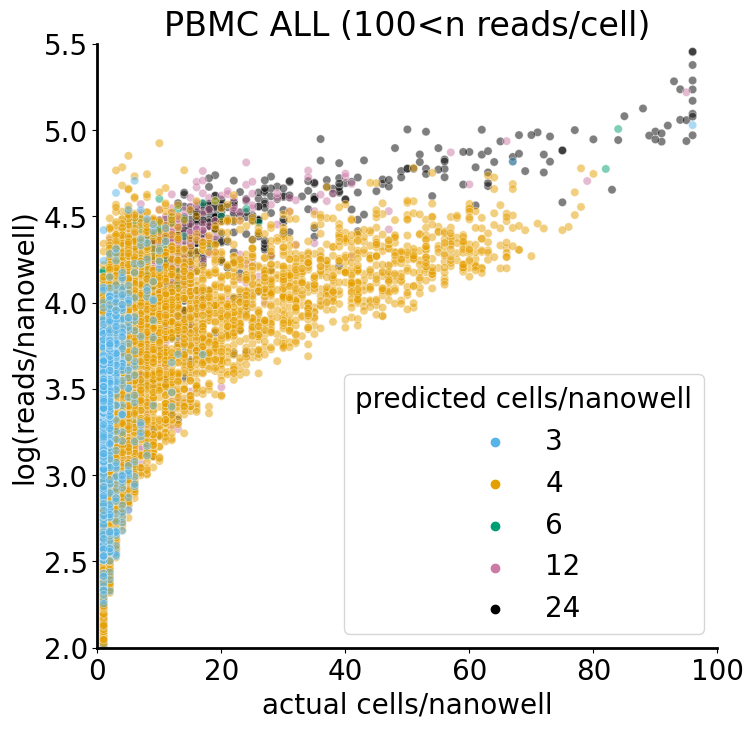

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


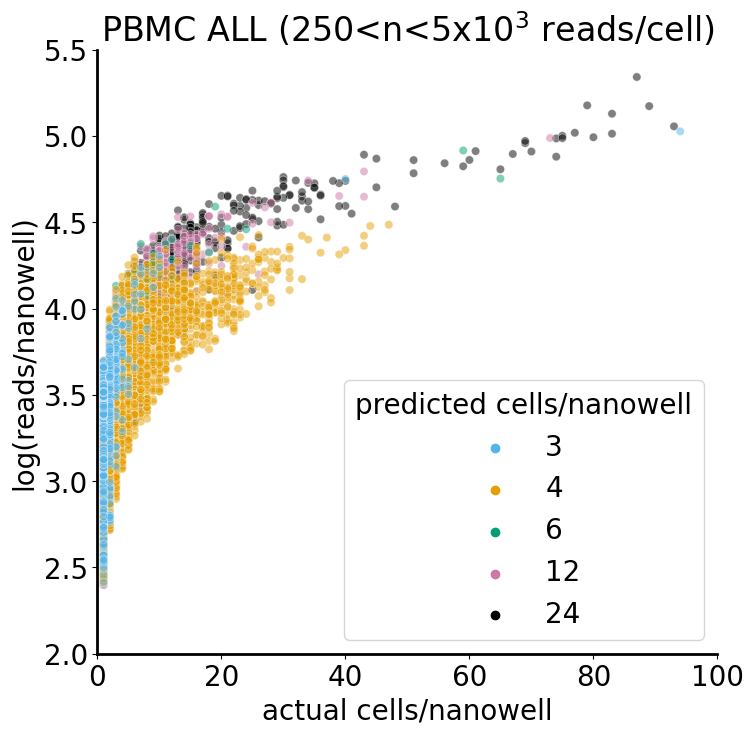

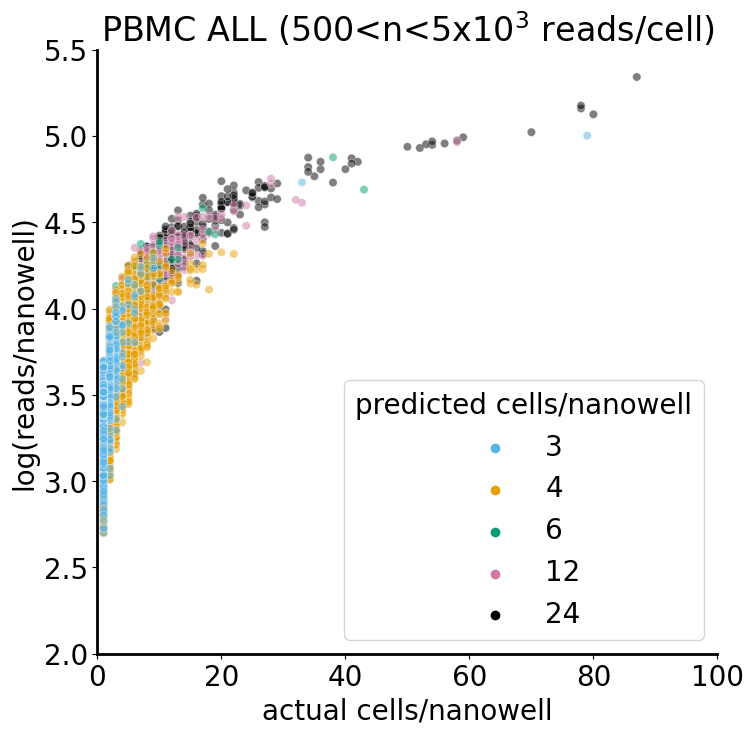

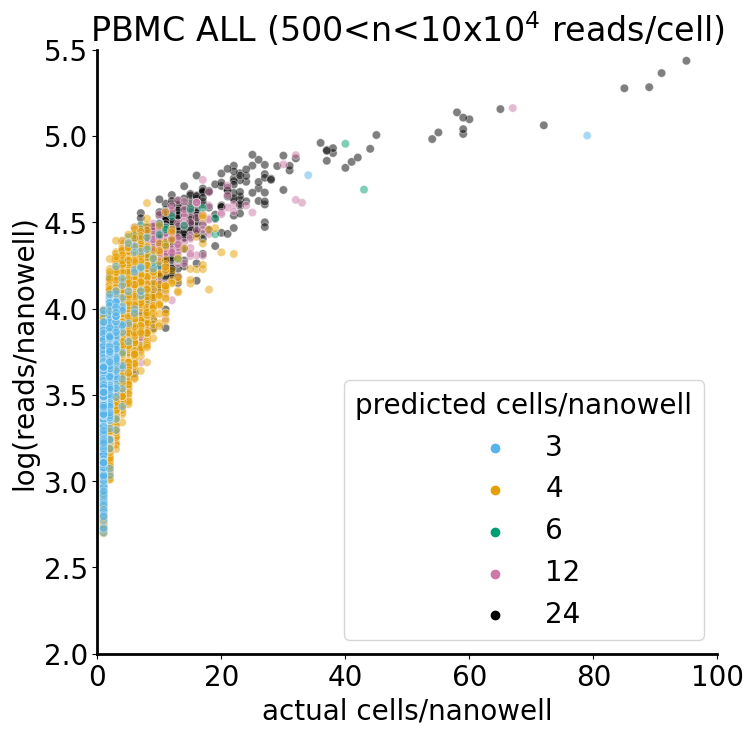

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


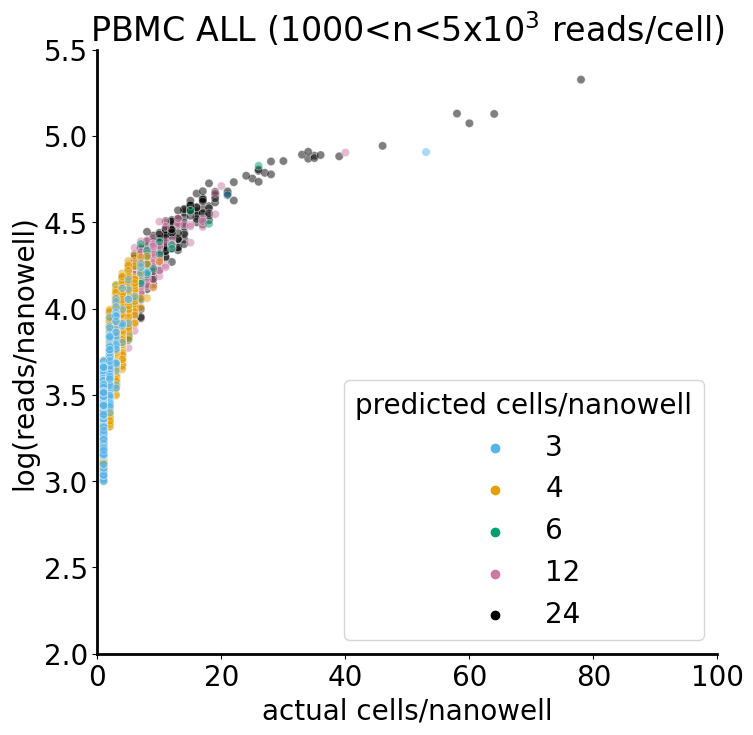

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


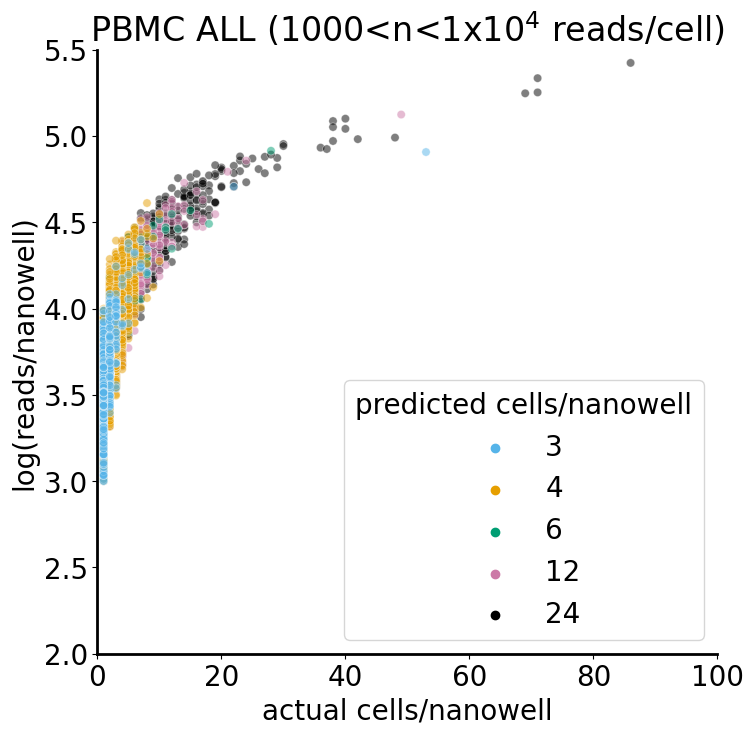

In [30]:
#reads x cells/nanowell log

for name, df in dfs.items():
    #recompute per well stats
    #quantify cells per well
    df['nanowell_cells'] = df.groupby('i')['soup_bc'].transform('size')
    df['96well_cells'] = df.groupby('s')['soup_bc'].transform('size')
    df['log_nanowell_cells'] = np.log10(df['nanowell_cells'])
    df['log_96well_cells'] = np.log10(df['96well_cells'])


    #quantify frags per well
    df['nanowell_frags'] = df.groupby('i')['nFrags'].transform('sum')
    df['96well_frags'] = df.groupby('s')['nFrags'].transform('sum')
    df['nanowell_std'] = df.groupby('i')['nFrags'].transform('std')
    df['96well_std'] = df.groupby('s')['nFrags'].transform('std')
    df['nanowell_mean'] = df.groupby('i')['nFrags'].transform('mean')
    df['96well_mean'] = df.groupby('s')['nFrags'].transform('mean')
    df['nanowell_frags_x1k'] = df['nanowell_frags']/1000

    #log transform
    df['log_nanowell_frags'] = np.log10(df['nanowell_frags'])
    df['log_96well_frags'] = np.log10(df['96well_frags'])
    df['log_nanowell_std'] = np.log10(df['nanowell_std'])
    df['log_96well_std'] = np.log10(df['96well_std'])
    df['log_nanowell_mean'] = np.log10(df['nanowell_mean'])
    df['log_96well_mean'] = np.log10(df['96well_mean'])
    
    
    ax= sns.scatterplot(data = df.drop_duplicates(subset=['nanowell_cells', 'log_nanowell_frags']),
                         x='nanowell_cells', 
                         y = 'log_nanowell_frags',
                         #element="step",
                         hue='predicted cells/nanowell',
                         #hue_order = ['0','1','1/0','0/1'], 
                         palette = ['#56b4e9', '#e69f00', '#009e73', '#CC79A7', '#000000'],
                         alpha = 0.5)
    
    #set labels
    ax.set_xlim(xmin=0, xmax=100)
    ax.set_ylim(ymin=2, ymax=5.5)
    ax.set(title=name)
    ax.set_xlabel('actual cells/nanowell')
    ax.set_ylabel('log(reads/nanowell)')
    #ax.legend(title='predicted cells/nanowell')   
    plt.show()

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


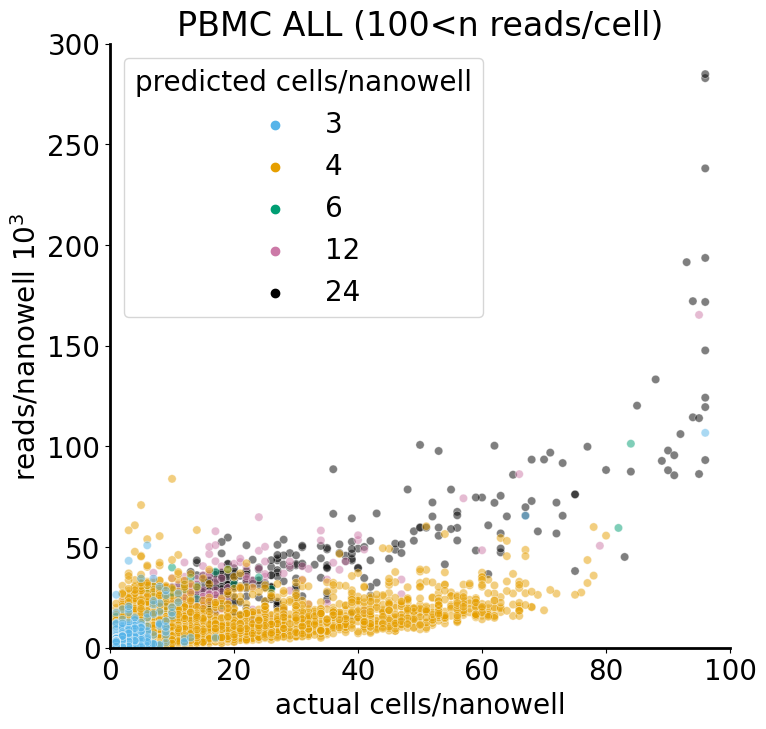

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


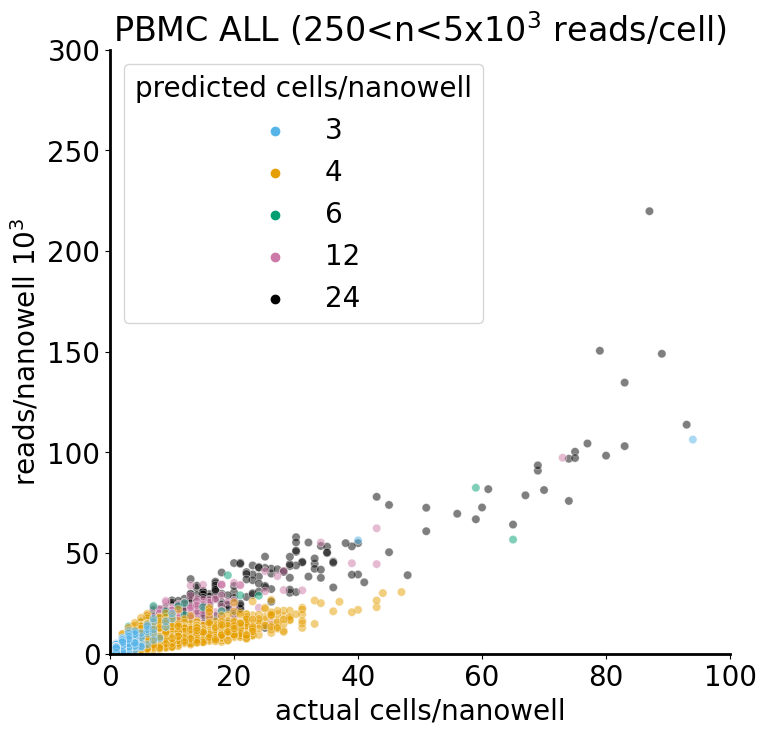

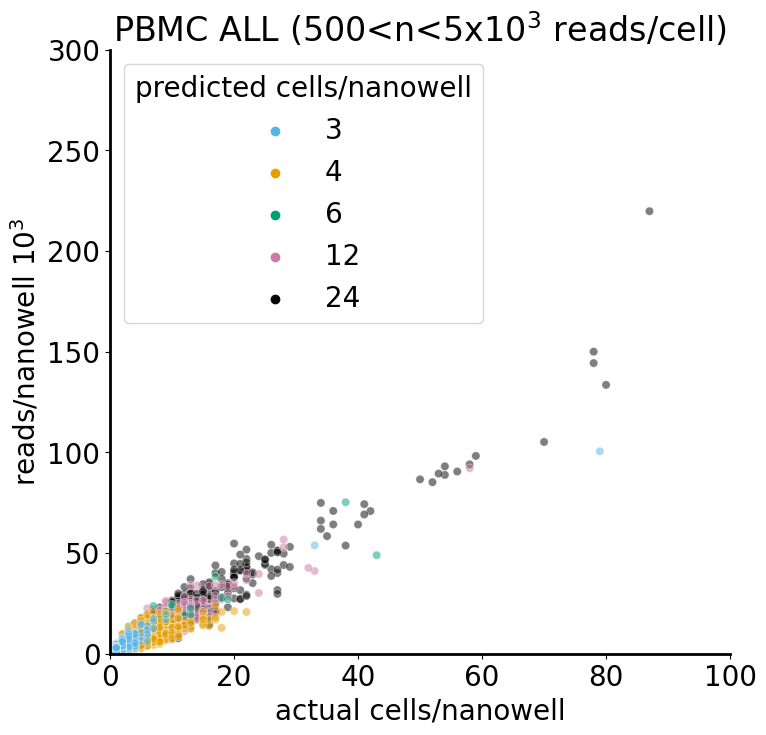

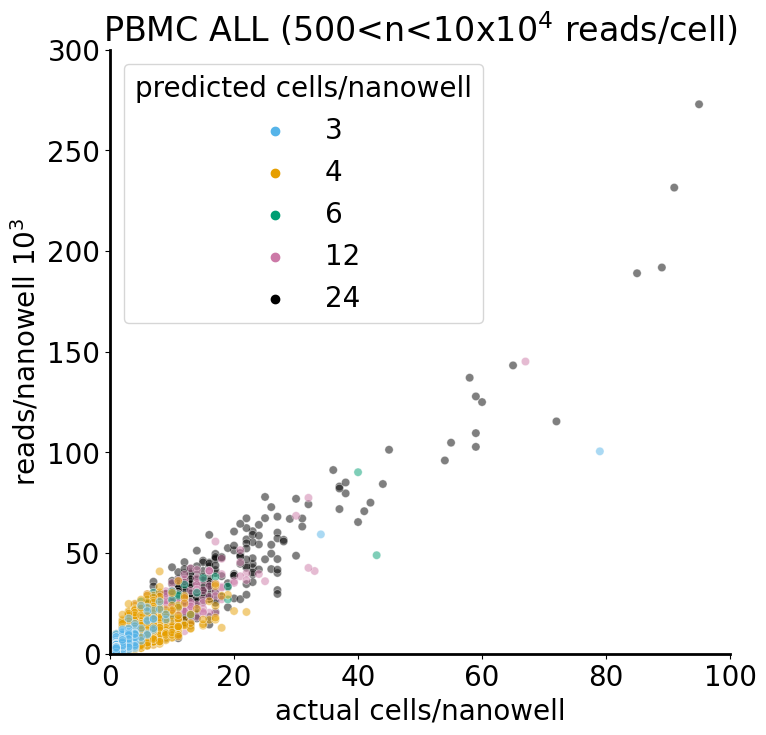

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


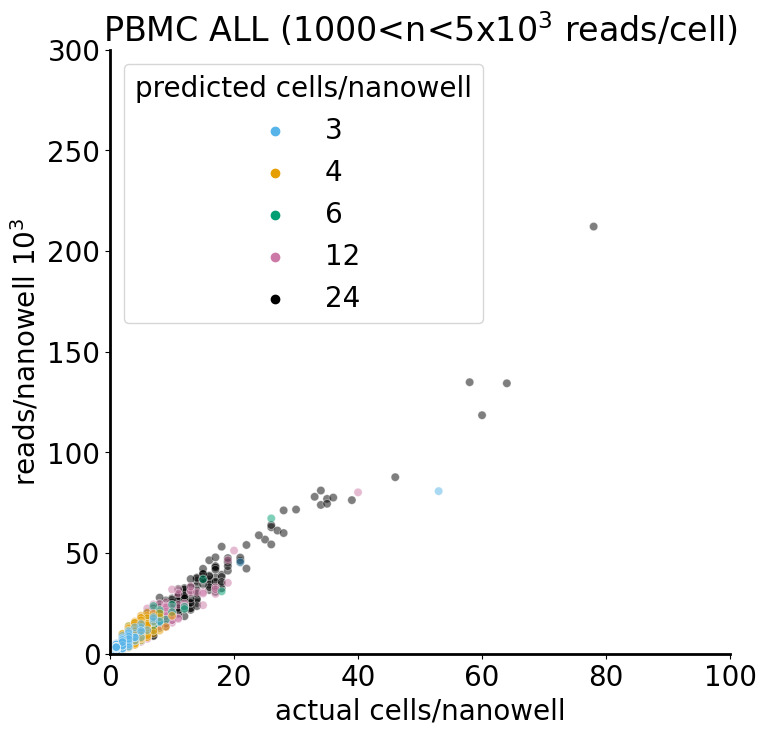

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


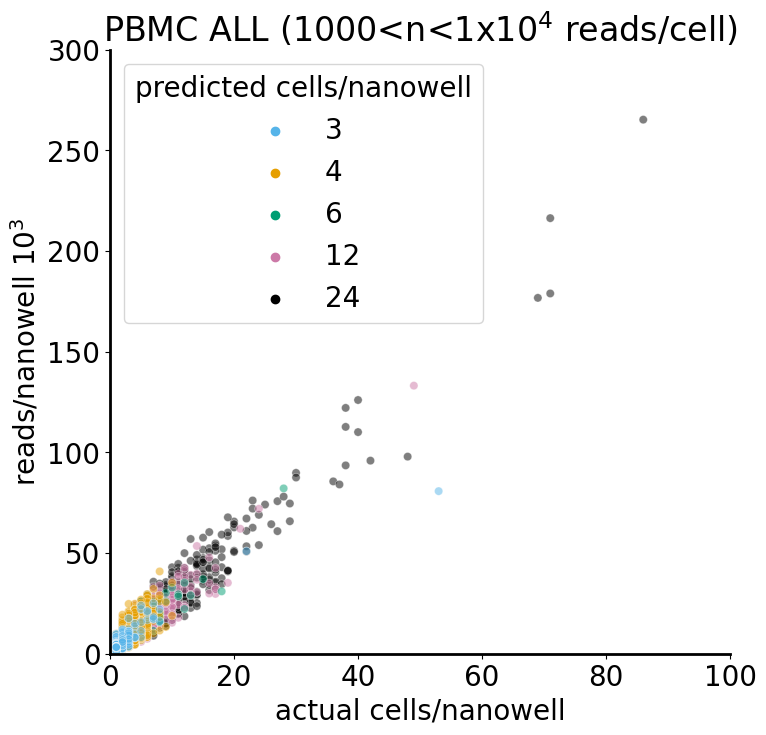

In [31]:
#reads x cells/nanowell

for name, df in dfs.items():

        #recompute per well stats
    #quantify cells per well
    df['nanowell_cells'] = df.groupby('i')['soup_bc'].transform('size')
    df['96well_cells'] = df.groupby('s')['soup_bc'].transform('size')
    df['log_nanowell_cells'] = np.log10(df['nanowell_cells'])
    df['log_96well_cells'] = np.log10(df['96well_cells'])


    #quantify frags per well
    df['nanowell_frags'] = df.groupby('i')['nFrags'].transform('sum')
    df['96well_frags'] = df.groupby('s')['nFrags'].transform('sum')
    df['nanowell_std'] = df.groupby('i')['nFrags'].transform('std')
    df['96well_std'] = df.groupby('s')['nFrags'].transform('std')
    df['nanowell_mean'] = df.groupby('i')['nFrags'].transform('mean')
    df['96well_mean'] = df.groupby('s')['nFrags'].transform('mean')
    df['nanowell_frags_x1k'] = df['nanowell_frags']/1000

    #log transform
    df['log_nanowell_frags'] = np.log10(df['nanowell_frags'])
    df['log_96well_frags'] = np.log10(df['96well_frags'])
    df['log_nanowell_std'] = np.log10(df['nanowell_std'])
    df['log_96well_std'] = np.log10(df['96well_std'])
    df['log_nanowell_mean'] = np.log10(df['nanowell_mean'])
    df['log_96well_mean'] = np.log10(df['96well_mean'])

    ax = sns.scatterplot(data = df.drop_duplicates(subset=['nanowell_cells', 'nanowell_frags_x1k']),
                         x='nanowell_cells', 
                         y = 'nanowell_frags_x1k',
                         #element="step",
                         hue='predicted cells/nanowell',
                         #hue_order = ['0','1','1/0','0/1'], 
                         palette = ['#56b4e9', '#e69f00', '#009e73', '#CC79A7', '#000000'],
                         alpha = 0.5)
    #set labels
    ax.set_xlim(xmin=0, xmax=100)
    ax.set_ylim(ymin=0, ymax=300)
    ax.set(title=name)
    ax.set_xlabel('actual cells/nanowell')
    ax.set_ylabel('reads/nanowell $10^3$')
    #ax.legend(title='predicted cells/nanowell')
    plt.show()

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/loc/scratch/14161148/ipykernel_5464/3652948356.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xmin=0, xmax=100)


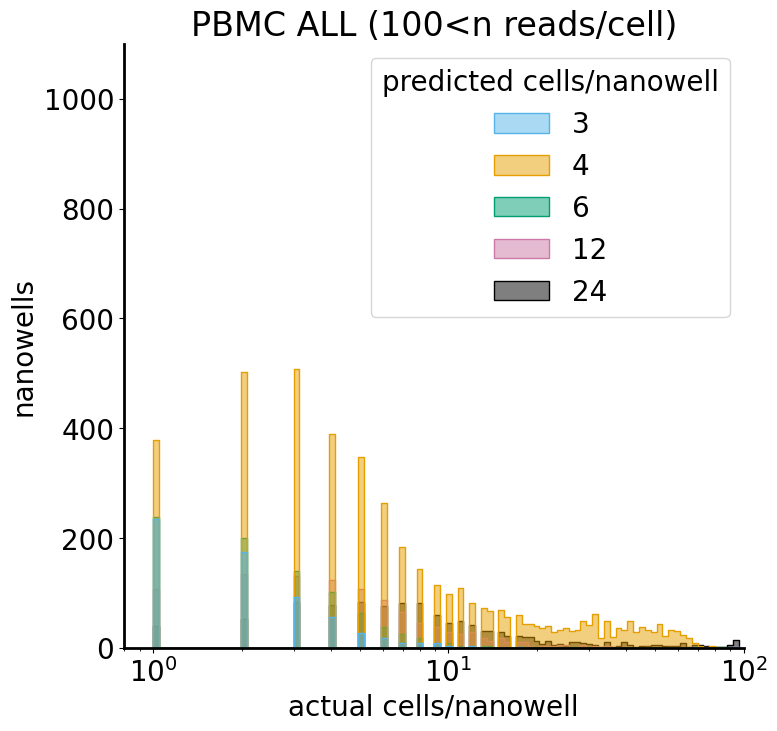

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/loc/scratch/14161148/ipykernel_5464/3652948356.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xmin=0, xmax=100)


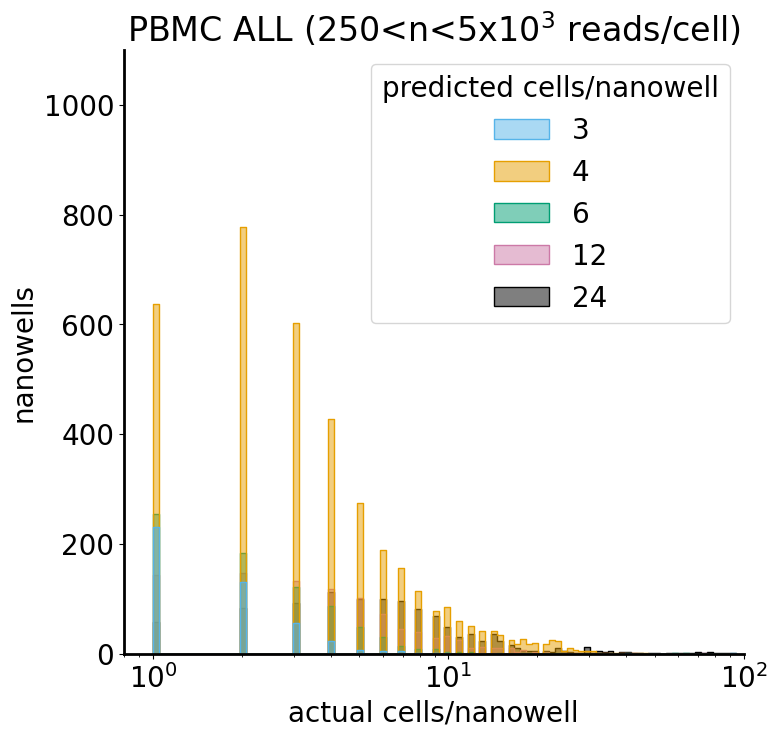

/loc/scratch/14161148/ipykernel_5464/3652948356.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xmin=0, xmax=100)


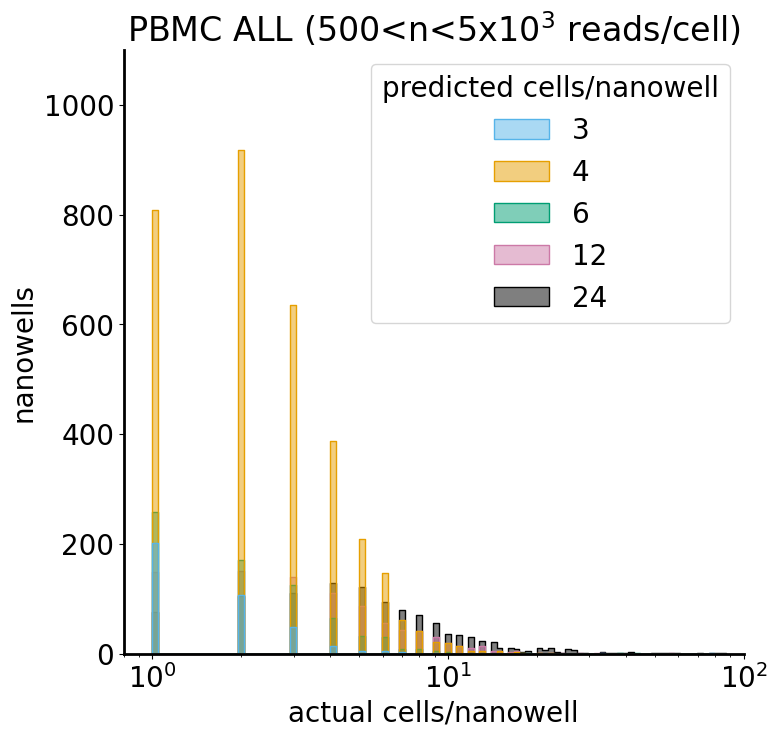

/loc/scratch/14161148/ipykernel_5464/3652948356.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xmin=0, xmax=100)


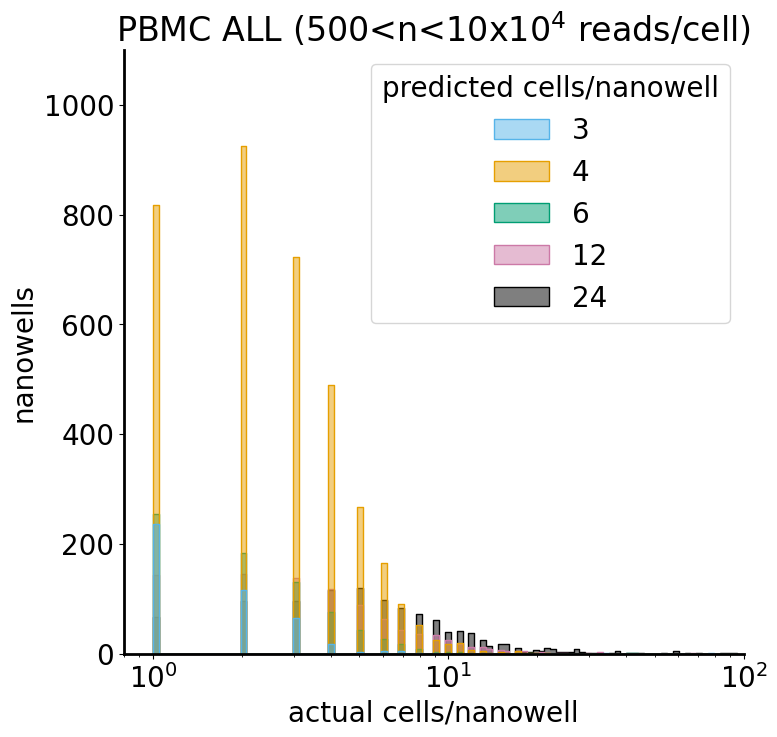

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/loc/scratch/14161148/ipykernel_5464/3652948356.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xmin=0, xmax=100)


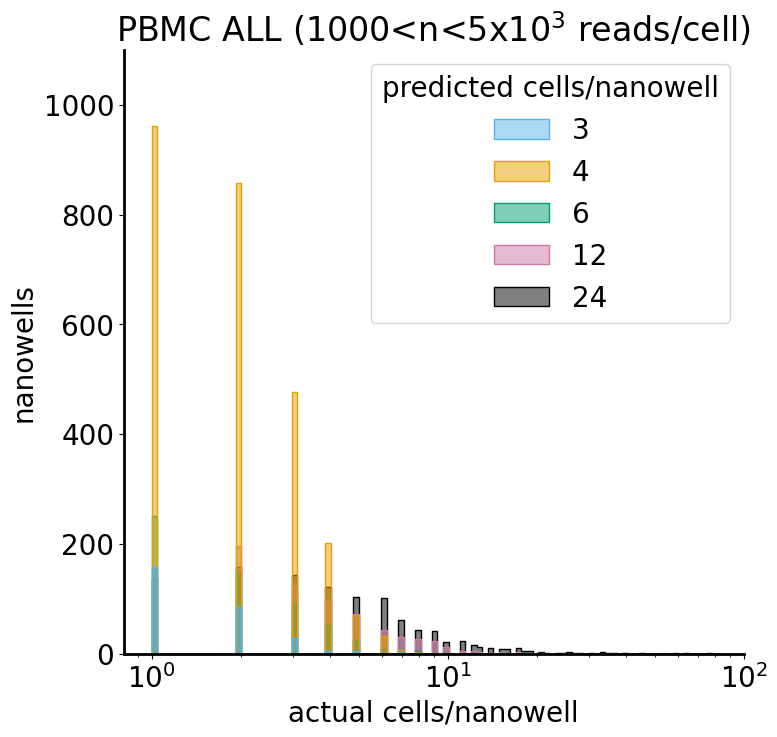

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/loc/scratch/14161148/ipykernel_5464/3652948356.py:42: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xmin=0, xmax=100)


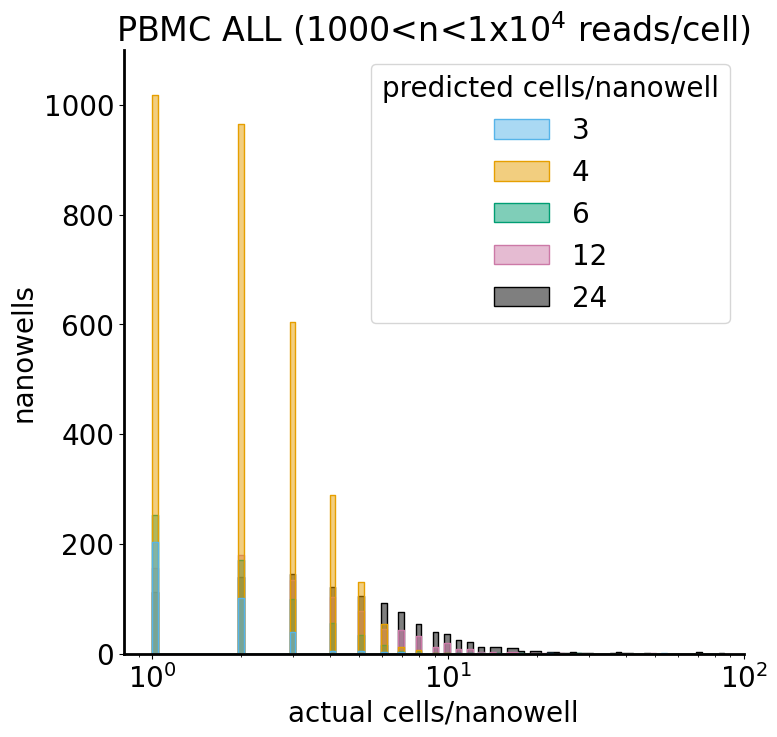

In [32]:
#counts x cells/nanowell

for name, df in dfs.items():
    
        #recompute per well stats
    #quantify cells per well
    df['nanowell_cells'] = df.groupby('i')['soup_bc'].transform('size')
    df['96well_cells'] = df.groupby('s')['soup_bc'].transform('size')
    df['log_nanowell_cells'] = np.log10(df['nanowell_cells'])
    df['log_96well_cells'] = np.log10(df['96well_cells'])


    #quantify frags per well
    df['nanowell_frags'] = df.groupby('i')['nFrags'].transform('sum')
    df['96well_frags'] = df.groupby('s')['nFrags'].transform('sum')
    df['nanowell_std'] = df.groupby('i')['nFrags'].transform('std')
    df['96well_std'] = df.groupby('s')['nFrags'].transform('std')
    df['nanowell_mean'] = df.groupby('i')['nFrags'].transform('mean')
    df['96well_mean'] = df.groupby('s')['nFrags'].transform('mean')
    df['nanowell_frags_x1k'] = df['nanowell_frags']/1000

    #log transform
    df['log_nanowell_frags'] = np.log10(df['nanowell_frags'])
    df['log_96well_frags'] = np.log10(df['96well_frags'])
    df['log_nanowell_std'] = np.log10(df['nanowell_std'])
    df['log_96well_std'] = np.log10(df['96well_std'])
    df['log_nanowell_mean'] = np.log10(df['nanowell_mean'])
    df['log_96well_mean'] = np.log10(df['96well_mean'])

    
    ax = sns.histplot(data = df.drop_duplicates(subset=['nanowell_cells', 'log_nanowell_frags']),
                      x='nanowell_cells',
                      element="step",
                      hue='predicted cells/nanowell',
                      #hue_order = ['0','1','1/0','0/1'], 
                      palette = ['#56b4e9', '#e69f00', '#009e73', '#CC79A7', '#000000'],
                      alpha = 0.5,
                      log_scale =True,
                      bins = 100)
    
    #set labels
    ax.set_xlim(xmin=0, xmax=100)
    ax.set_ylim(ymin=0, ymax=1100)
    ax.set(title=name)
    ax.set_xlabel('actual cells/nanowell')
    ax.set_ylabel('nanowells')
    #ax.legend(title='predicted cells/nanowell')
    plt.show()

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


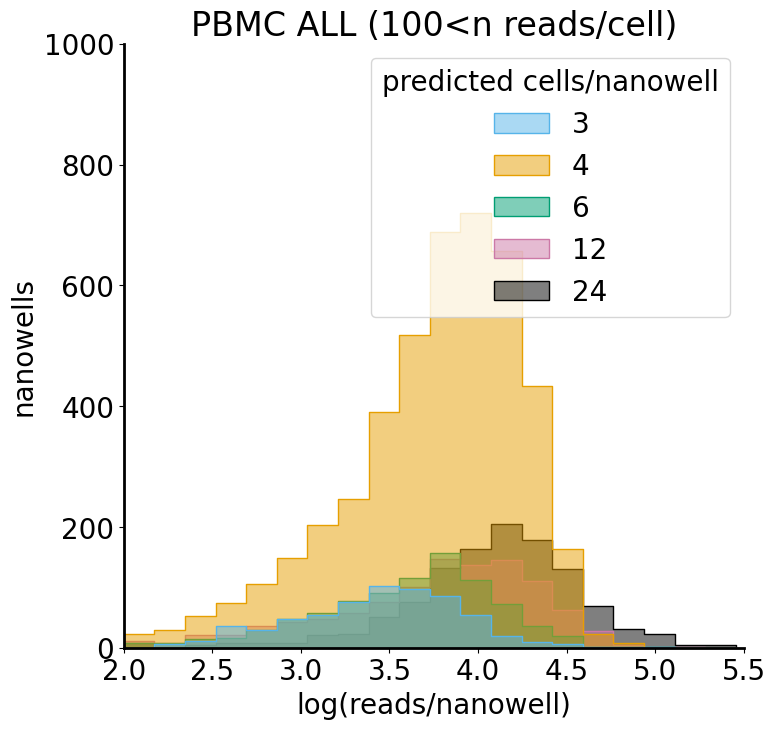

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


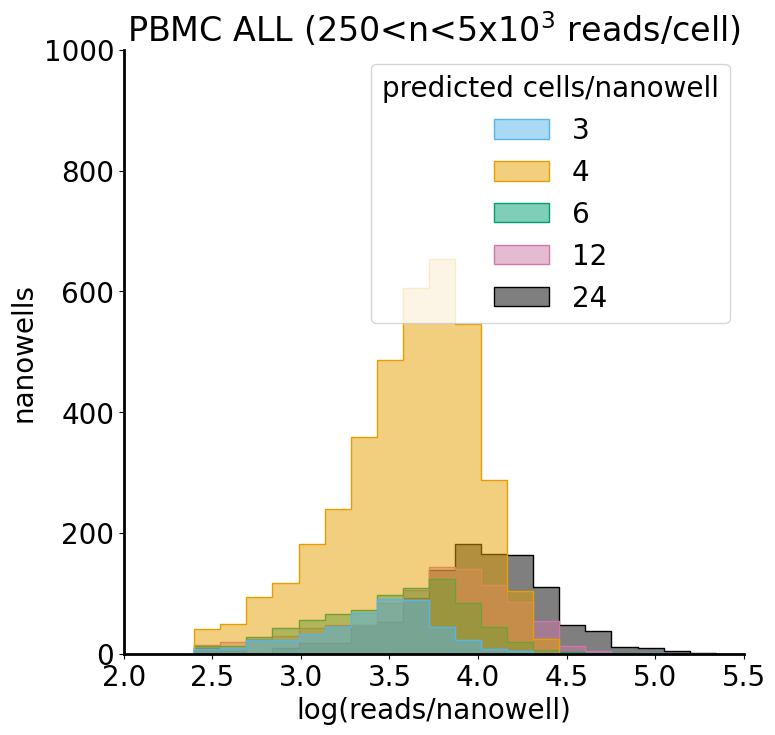

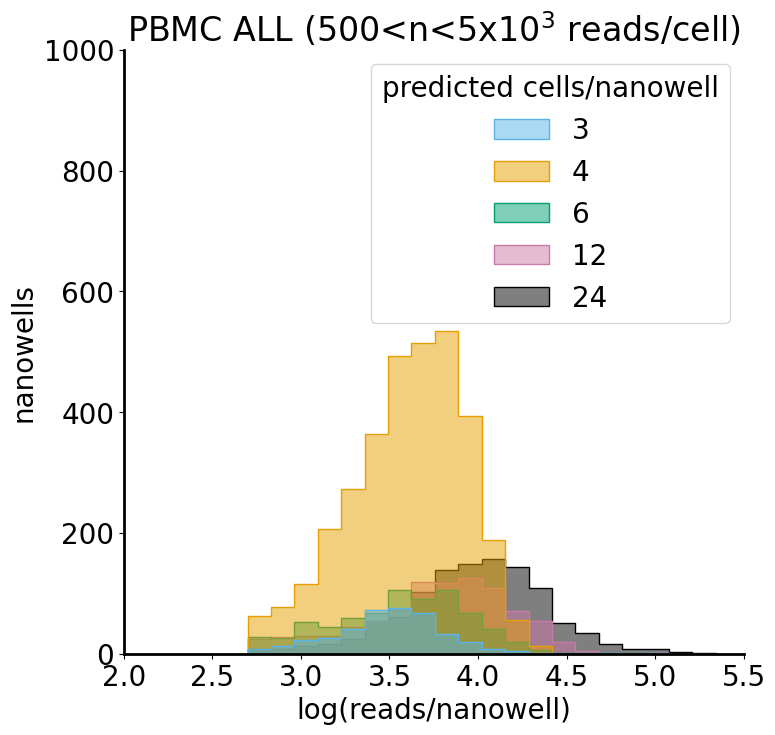

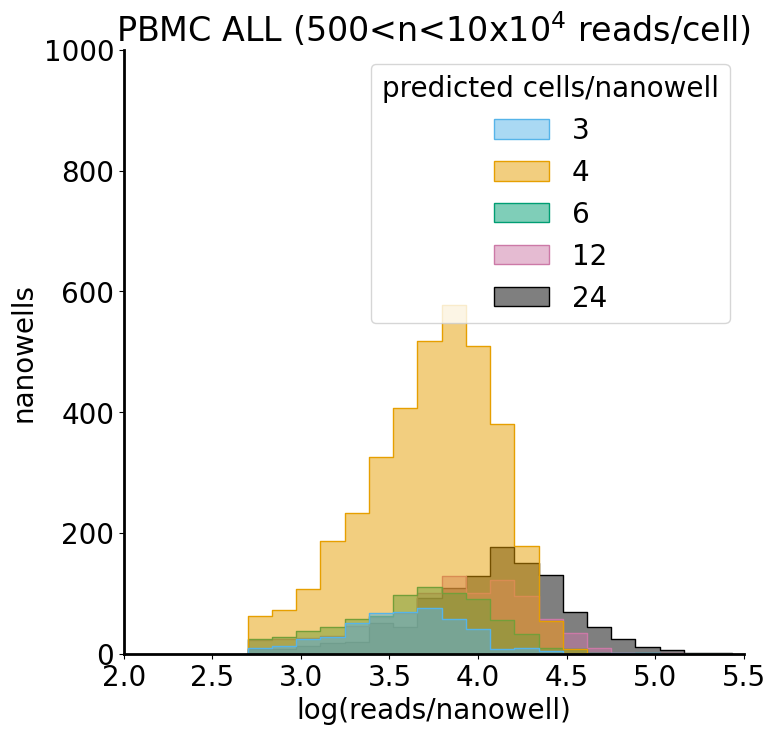

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


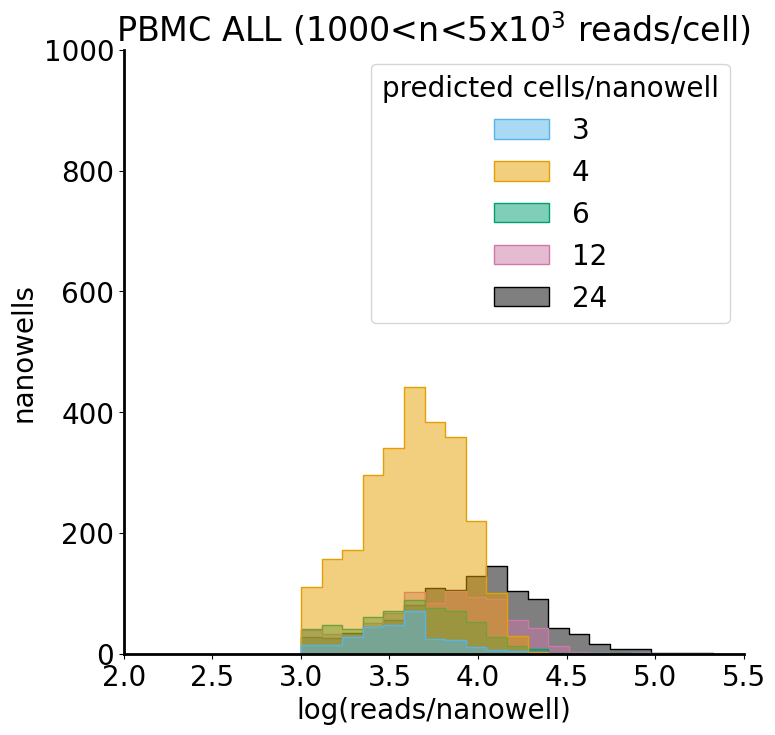

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


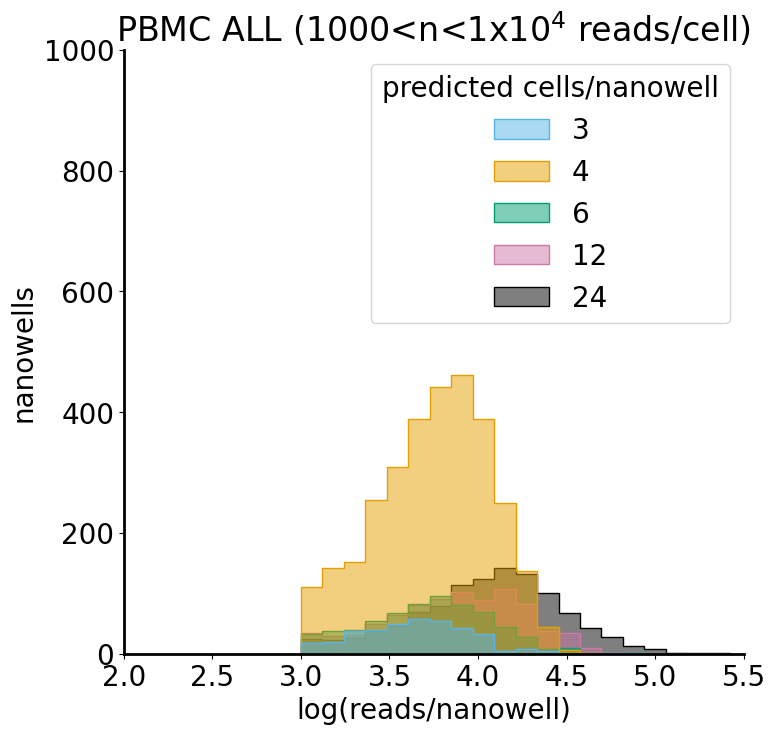

In [33]:
#counts x reads/nanowell

for name, df in dfs.items():
    
        #recompute per well stats
    #quantify cells per well
    df['nanowell_cells'] = df.groupby('i')['soup_bc'].transform('size')
    df['96well_cells'] = df.groupby('s')['soup_bc'].transform('size')
    df['log_nanowell_cells'] = np.log10(df['nanowell_cells'])
    df['log_96well_cells'] = np.log10(df['96well_cells'])


    #quantify frags per well
    df['nanowell_frags'] = df.groupby('i')['nFrags'].transform('sum')
    df['96well_frags'] = df.groupby('s')['nFrags'].transform('sum')
    df['nanowell_std'] = df.groupby('i')['nFrags'].transform('std')
    df['96well_std'] = df.groupby('s')['nFrags'].transform('std')
    df['nanowell_mean'] = df.groupby('i')['nFrags'].transform('mean')
    df['96well_mean'] = df.groupby('s')['nFrags'].transform('mean')
    df['nanowell_frags_x1k'] = df['nanowell_frags']/1000

    #log transform
    df['log_nanowell_frags'] = np.log10(df['nanowell_frags'])
    df['log_96well_frags'] = np.log10(df['96well_frags'])
    df['log_nanowell_std'] = np.log10(df['nanowell_std'])
    df['log_96well_std'] = np.log10(df['96well_std'])
    df['log_nanowell_mean'] = np.log10(df['nanowell_mean'])
    df['log_96well_mean'] = np.log10(df['96well_mean'])
    
    ax = sns.histplot(data = df.drop_duplicates(subset=['nanowell_cells', 'log_nanowell_frags']),
                         x='log_nanowell_frags',
                         element="step",
                         hue='predicted cells/nanowell',
                         #hue_order = ['0','1','1/0','0/1'], 
                         palette = ['#56b4e9', '#e69f00', '#009e73', '#CC79A7', '#000000'],
                         alpha = 0.5, 
                      bins = 20)
    
    #set labels
    ax.set_xlim(xmin= 2, xmax = 5.5)
    ax.set_ylim(ymin= 0, ymax = 1000)
    ax.set(title=name)
    ax.set_xlabel('log(reads/nanowell)')
    ax.set_ylabel('nanowells')
    #ax.legend(title='predicted cells/nanowell')
    plt.show()

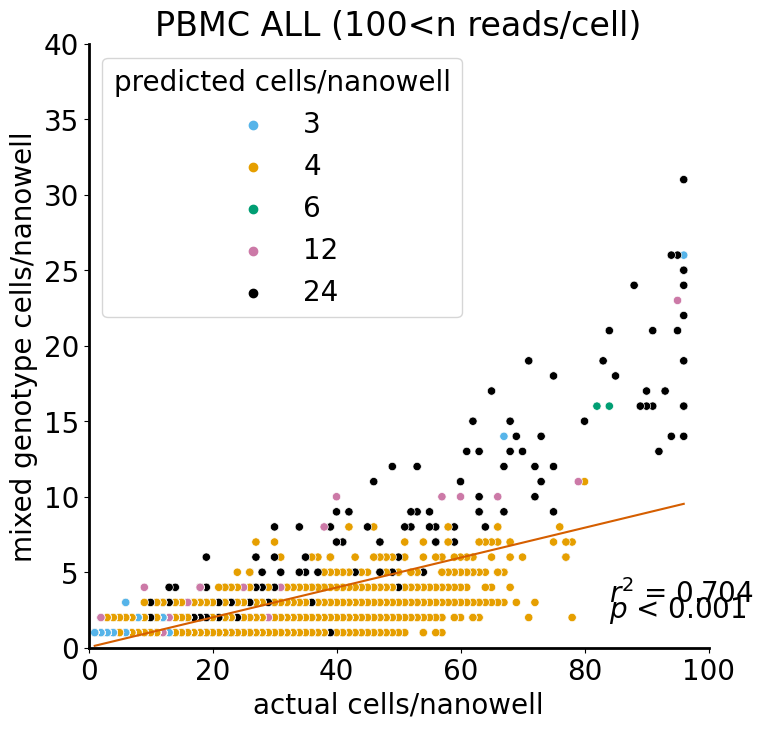

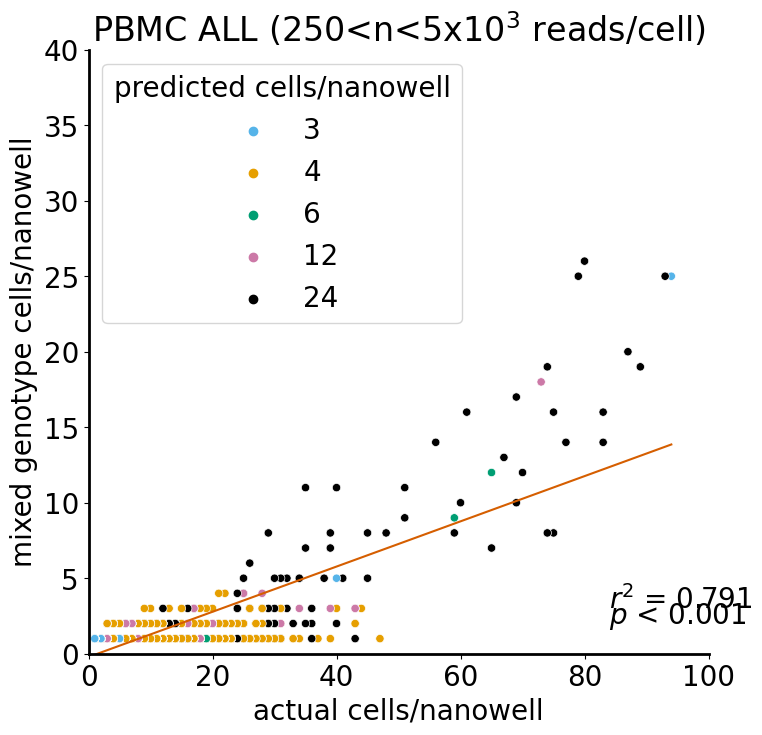

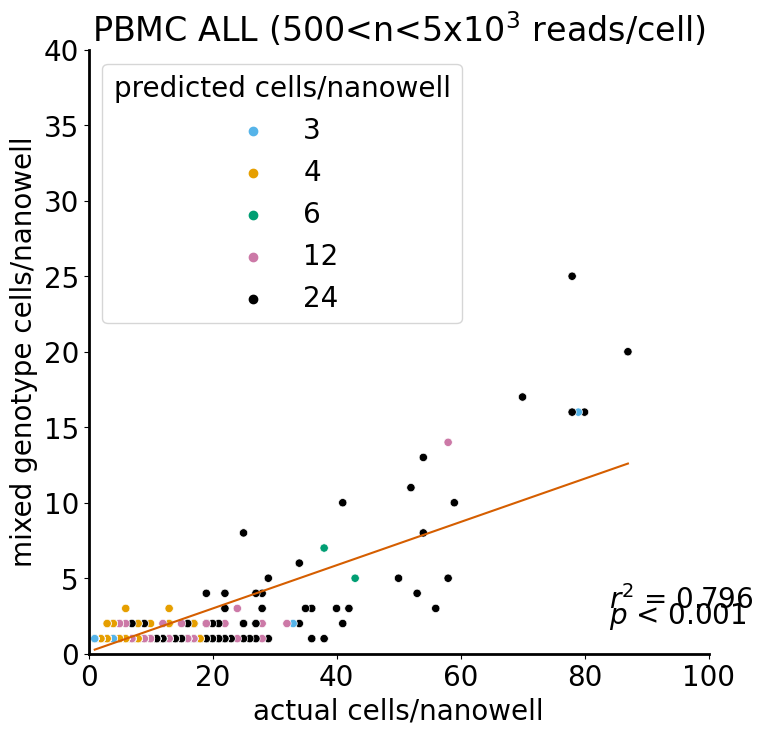

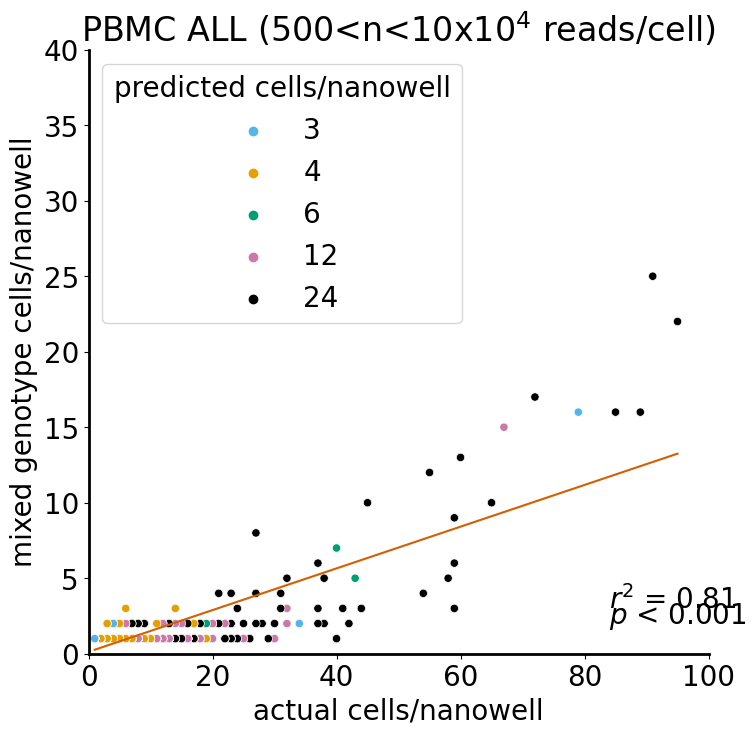

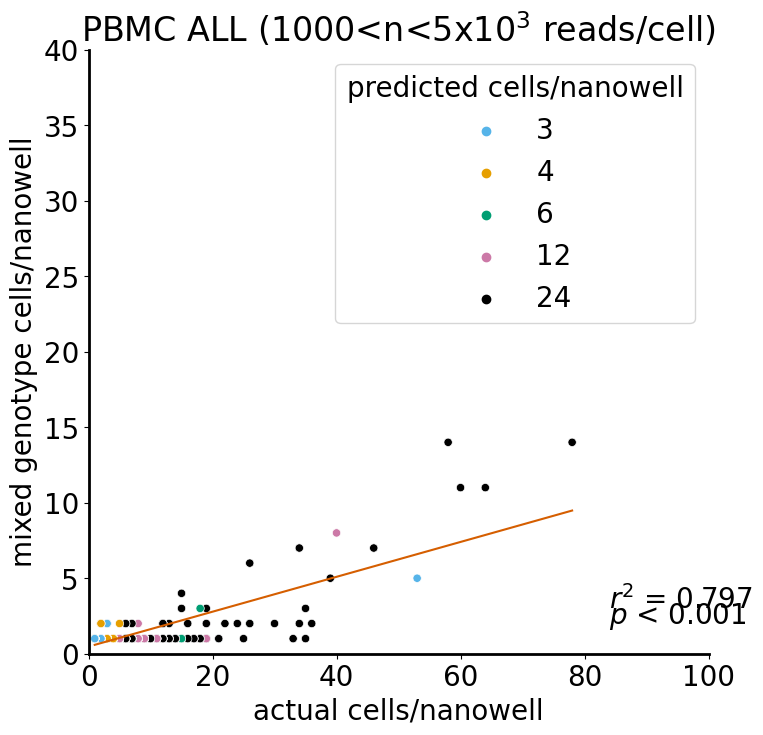

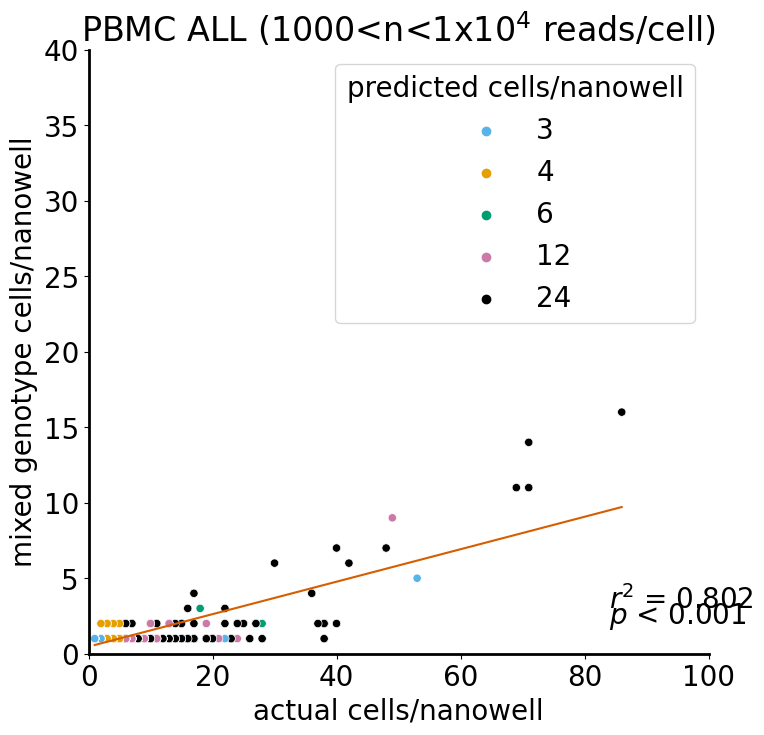

In [34]:
#mixed genotype cells x cells/nanowell

for name, df in dfs.items():
    
    # count genotypes per nanowell (cgpn)
    cgpn = df.groupby(['i','genotype']).size().reset_index(name='cells')
    cgpn = cgpn.set_index('i')

    # Count cells per nanowell (ccps)
    ccpn = df['i'].value_counts().reset_index(name='total_cells')
    ccpn = ccpn.set_index('index')

    # get dispense condition per nanowell (dcpn)
    dcpn = df.groupby(['i','predicted cells/nanowell']).size().reset_index(name='x').drop(columns=['x'])
    dcpn = dcpn.set_index('i')

    # merge
    cgpn_1 = pd.merge(left = cgpn, right = ccpn, how = 'left', left_index = True, right_index = True)
    cgpn_MERGE = pd.merge(left = cgpn_1, right = dcpn, how = 'left', left_index = True, right_index = True)

    # Calc fraction of mixed genotype per nanowell
    cgpn_MERGE['frac'] = cgpn_MERGE['cells']/cgpn_MERGE['total_cells'] * 100
    cgpn_MERGE = cgpn_MERGE.sort_values(by=['total_cells', 'genotype'], ascending=False)

    #plot it
    ax = sns.scatterplot(data = cgpn_MERGE[cgpn_MERGE['genotype'] == 'Mixed'],
                         x='total_cells',
                         y='cells',
                        #element="step",
                         hue='predicted cells/nanowell',
                         #hue_order = ['0','1','1/0','0/1'], 
                         palette = ['#56b4e9', '#e69f00', '#009e73', '#CC79A7', '#000000'],
                        #alpha = 0.5
                     )

    #linear regression
    x=cgpn_MERGE[cgpn_MERGE['genotype'] == 'Mixed']['total_cells']
    y=cgpn_MERGE[cgpn_MERGE['genotype'] == 'Mixed']['cells']
    m, b, r2, p, std_err = stats.linregress(x, y)

    #plot linear regression
    plt.plot(x, m*x+b, color='#D55E00')
    plt.annotate('$r^2$ = ' + round(r2, 3).astype(str), xy = (84,3))
    plt.annotate('$p$ < 0.001', xy = (84,2))

    #set labels
    ax.set_xlim(xmin= 0, xmax = 100)
    ax.set_ylim(ymin= 0, ymax = 40)
    ax.set(title=name)
    ax.set_xlabel('actual cells/nanowell')
    ax.set_ylabel('mixed genotype cells/nanowell')
    #ax.legend(title='predicted cells/nanowell')
    plt.show()


In [35]:
#specify data for plotting
dfs_0 = {'PBMC ALL (500<n<5x10\u00b3 reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 4000)],
         'PBMC ALL (500<n<5x10\u2074 reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 10000)],
         #'PBMC ALL (1x10\u00b3<n<5x10\u00b3 reads/cell)':ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 1000) & (ALL_meta_MERGE['nFrags'] <= 5000)],
      }

In [36]:
#print mean, median, stdev cells/nanowell
for name, df in dfs_0.items():
    print(name)
    print(tabulate(pd.DataFrame(df.groupby('predicted cells/nanowell')['nanowell_cells'].mean()).rename(columns={'nanowell_cells':'mean cells/nanowell'})
, headers='keys', tablefmt='simple'))
    print(tabulate(pd.DataFrame(df.groupby('predicted cells/nanowell')['nanowell_cells'].median()).rename(columns={'nanowell_cells':'median cells/nanowell'})
, headers='keys', tablefmt='simple'))
    print(tabulate(pd.DataFrame(df.groupby('predicted cells/nanowell')['nanowell_cells'].std()).rename(columns={'nanowell_cells':'stdev cells/nanowell'})
, headers='keys', tablefmt='simple'))
    print('---')

PBMC ALL (500<n<5x10³ reads/cell)
  predicted cells/nanowell    mean cells/nanowell
--------------------------  ---------------------
                         3               13.2969
                         4               20.5918
                         6                8.68543
                        12               14.3102
                        24               32.0499
  predicted cells/nanowell    median cells/nanowell
--------------------------  -----------------------
                         3                        3
                         4                       12
                         6                        4
                        12                        9
                        24                       17
  predicted cells/nanowell    stdev cells/nanowell
--------------------------  ----------------------
                         3                 27.4604
                         4                 19.6862
                         6                 15.9202
 

In [37]:
#print cells/mark

for name, df in dfs_0.items():
    print(name)
    print(pd.DataFrame(df['Mark'].value_counts()).rename(columns={'Mark':'Cells'}))
    print('---')

PBMC ALL (500<n<5x10³ reads/cell)
         Cells
K27me3   14311
K4me123  10978
---
PBMC ALL (500<n<5x10⁴ reads/cell)
         Cells
K27me3   17976
K4me123  11523
---


In [38]:
ALL_meta_MERGE.columns

Index(['Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter',
       'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio',
       'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio',
       'i7', 'i5', 's7', 's5', 'Subsample', 'Date', 'Mark', 'Donor',
       'Cells per well', 'Sample name', 'soup_bc', 'bed_bc', 'status',
       'assignment', 'log_prob_singleton', 'log_prob_doublet', 'cluster0',
       'cluster1', 'genotype', 'i', 's', 'nanowell_cells', '96well_cells',
       'log_nanowell_cells', 'log_96well_cells', 'nanowell_frags',
       '96well_frags', 'nanowell_std', '96well_std', 'nanowell_mean',
       '96well_mean', 'nanowell_frags_x1k', 'log_nanowell_frags',
       'log_96well_frags', 'log_nanowell_std', 'log_96well_std',
       'log_nanowell_mean', 'log_96well_mean', 'logcluster0', 'logcluster1',
       'logclusterdiff', 'predicted cells/nanowell'],
      dtype='object')

# PCA

In [39]:
genos = ['0','1']
ALL_meta_MERGE['genotype'] = ALL_meta_MERGE['assignment'].apply(lambda i: i if i in genos else 'collision')
ALL_meta_MERGE['genotype'].value_counts()

1            41148
0            39303
collision     5628
Name: genotype, dtype: int64

In [40]:
#specify data for plotting

ALL_meta_MERGE_SUB_0 = ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 10000)]
ALL_meta_MERGE_SUB_1 = ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 10000)]
ALL_meta_MERGE_SUB_0['genotype'].value_counts()

1            15170
0            13412
collision      917
Name: genotype, dtype: int64

In [41]:
ALL_meta_MERGE_SUB_1['genotype'].value_counts()

1            15170
0            13412
collision      917
Name: genotype, dtype: int64

In [42]:
dfs_3 = {#'PBMC ALL':ALL_meta_MERGE_SUB_0, 
       'PBMC K27me3':ALL_meta_MERGE_SUB_0[ALL_meta_MERGE_SUB_0['Mark'] == 'K27me3'], 
       'PBMC K4me123':ALL_meta_MERGE_SUB_1[ALL_meta_MERGE_SUB_1['Mark'] == 'K4me123']
      }

In [43]:
ALL_meta_MERGE_SUB_0['predicted cells/nanowell'].value_counts()

4     11939
24     9420
12     4749
6      2247
3      1144
Name: predicted cells/nanowell, dtype: int64

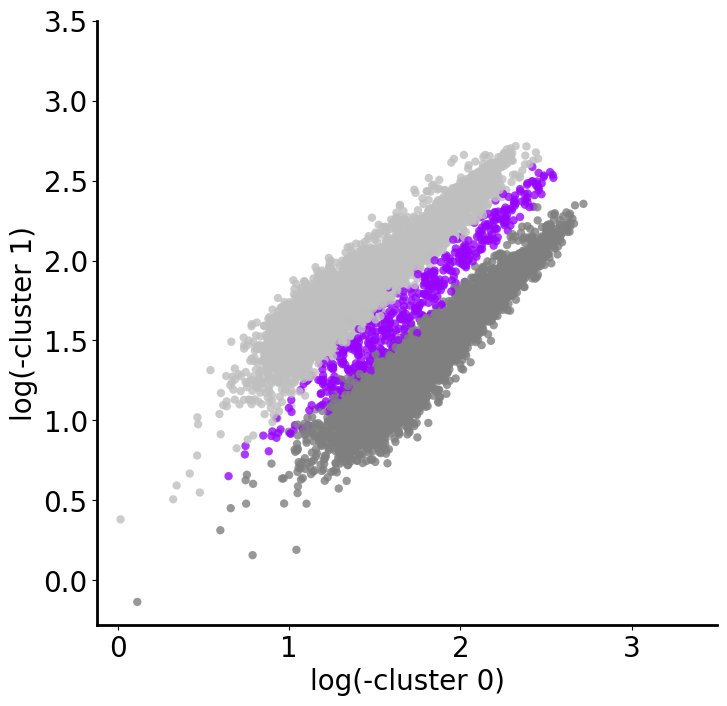

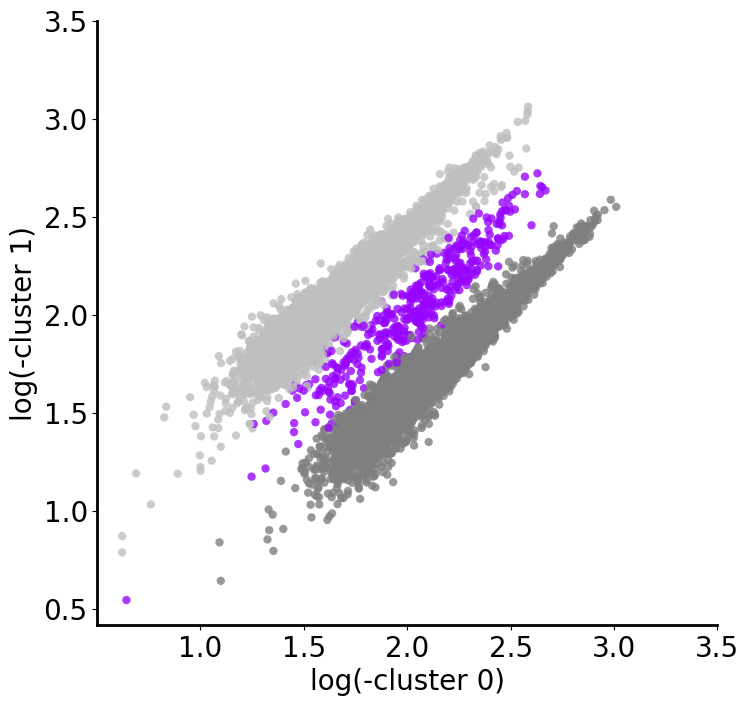

In [44]:
# plot genotypes by assignment
for name, df in dfs_3.items():
    
    #plot pca of genotypes
    ax = sns.scatterplot(data=df,
                          x="logcluster0",
                          y="logcluster1",
                          hue='genotype',
                          hue_order = ['0','1','collision'], 
                          palette = ['#bfbfbf', '#7f7f7f', '#9705ff'],
                          alpha = 0.8,
                        edgecolor = 'none')

    #set labels
    ax.set_xlim(xmax = 3.5)
    ax.set_ylim(ymax = 3.5)
    #ax.set(title=name + ' clustered by genotype')
    ax.set_xlabel('log(-cluster 0)')
    ax.set_ylabel('log(-cluster 1)')
    ax.legend(title='Genotype \nassignment', loc='lower right', frameon = False, markerscale=3)
    # ax.set(xticklabels=[])
    # ax.set(yticklabels=[])
    # ax.tick_params(bottom=False, left=False)
    ax.get_legend().remove()
    plt.savefig(
        fig_dir + '221129_PBMC_geno_cluster_' + name + '_no_legend.pdf',
        transparent=True,
        bbox_inches='tight',
        #facecolor = 'black'
    )
    plt.show()

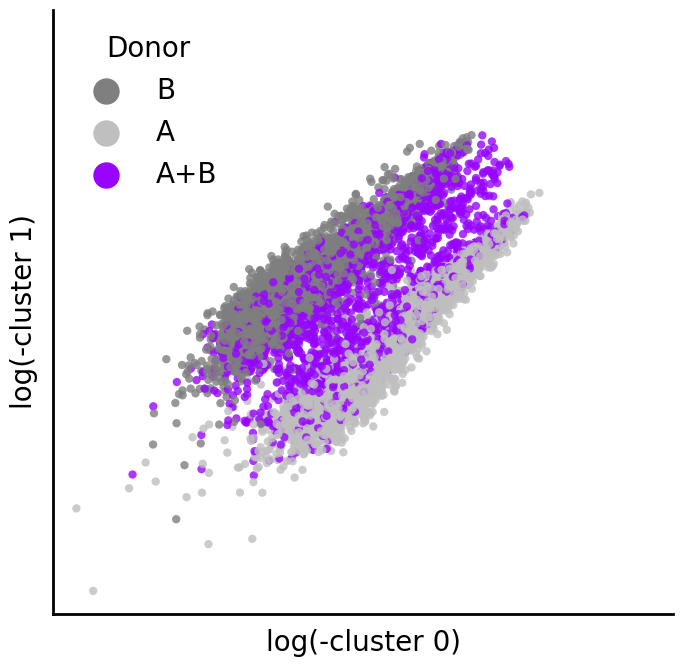

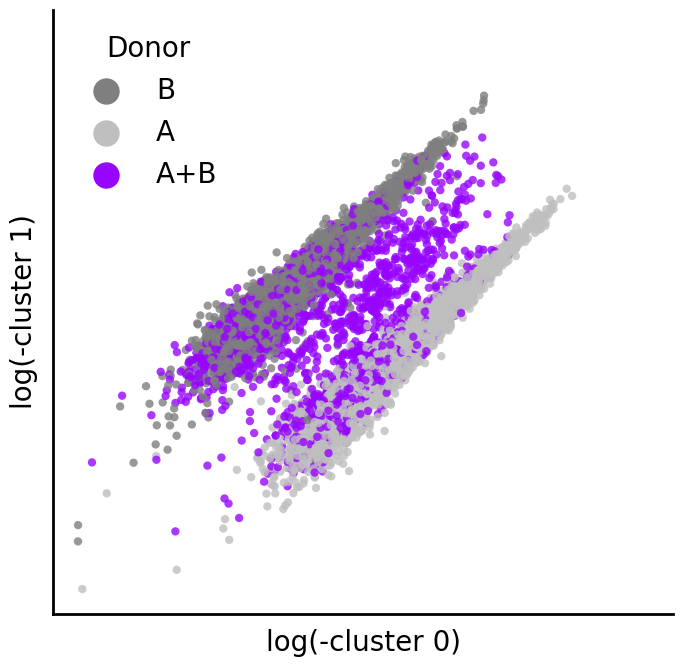

In [45]:
# plot genotypes by assignment
for name, df in dfs_3.items():
    
    #plot pca of genotypes
    ax = sns.scatterplot(data=df,
                          x="logcluster0",
                          y="logcluster1",
                          hue='Donor',
                          hue_order = ['B','A','A+B'], 
                          palette = ['#7f7f7f', '#bfbfbf', '#9705ff'],
                          alpha = 0.8,
                         edgecolor = 'none')

    #set labels
    ax.set_xlim(xmax = 3.5)
    ax.set_ylim(ymax = 3.5)
    #ax.set(title=name + ' clustered by genotype')
    ax.set_xlabel('log(-cluster 0)')
    ax.set_ylabel('log(-cluster 1)')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.tick_params(bottom=False, left=False)
    ax.legend(title='Donor', loc='best', frameon = False,  markerscale=3)
    #ax.get_legend().remove()
    plt.show()

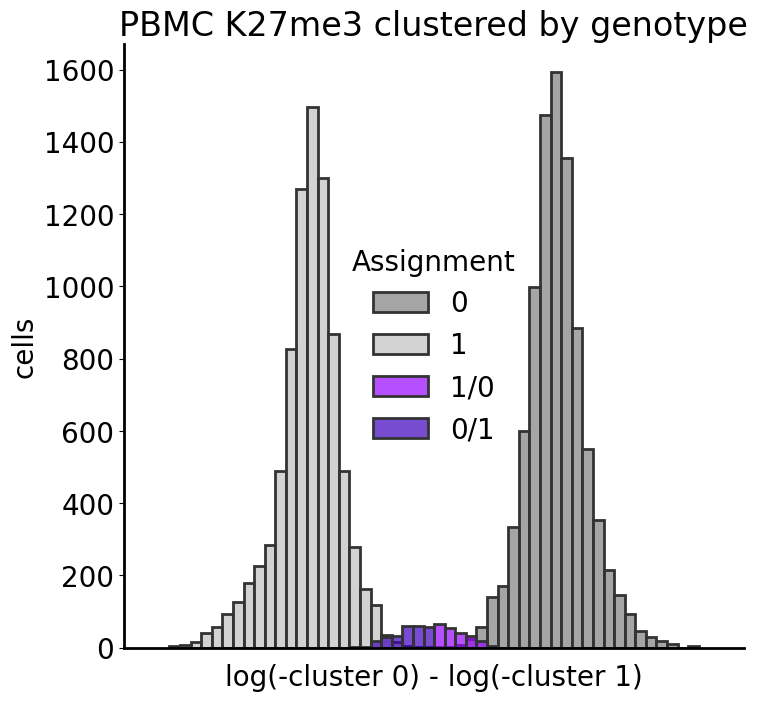

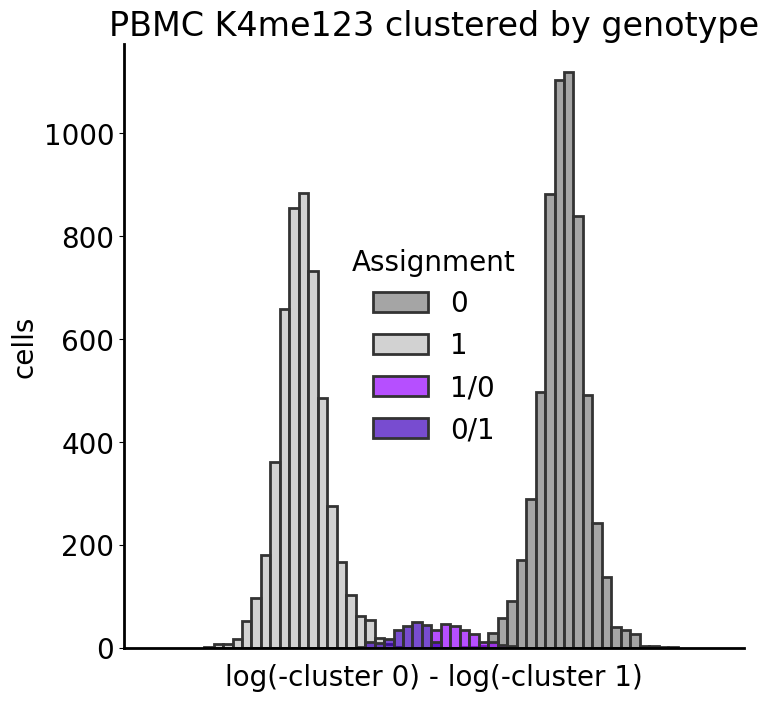

In [46]:
# plot hist of genotypes by assignment
for name, df in dfs_3.items():
    
    #plot pca of genotypes
    ax = sns.histplot(data = df,
                      x='logclusterdiff', 
                      bins=50, 
                      hue='assignment',
                      hue_order = ['0/1','1/0', '0','1'], 
                      palette = [ '#3f00bd', '#9705ff','#bfbfbf', '#7f7f7f'],
                      alpha = 0.7,
                      multiple = 'layer',
                      edgecolor=".2",
                      linewidth = 2)

    #set labels
    ax.set_xlim(xmin= -1, xmax = 1)
    #ax.set_ylim(ymin= 0, ymax = 1600)
    ax.set(title=name + ' clustered by genotype')
    ax.set_xlabel('log(-cluster 0) - log(-cluster 1)')
    ax.set_ylabel('cells')
    #ax.legend(title='genotype')
    ax.set(xticklabels=[])
    ax.tick_params(bottom=False)
    ax.legend(title='Assignment', loc='center', labels=['0','1','1/0','0/1'], frameon = False)
    plt.show()

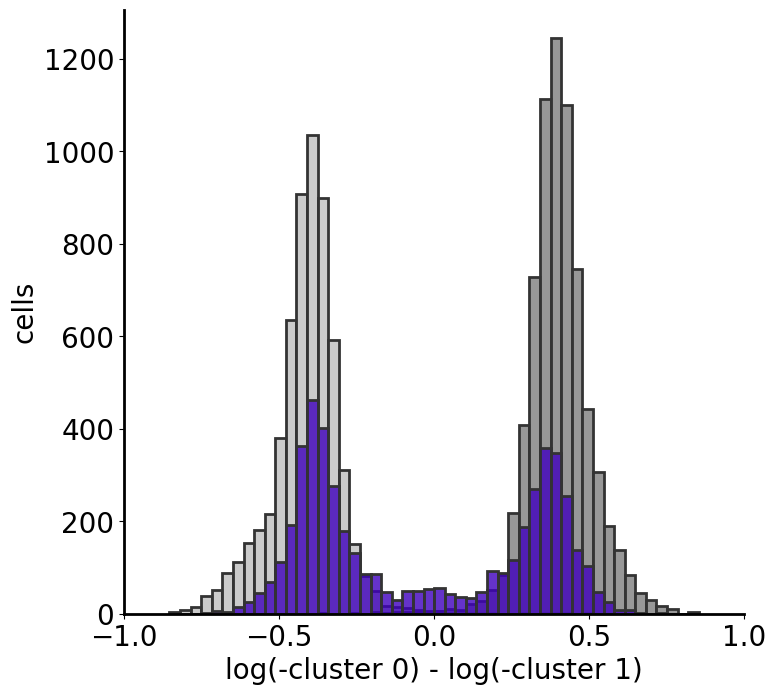

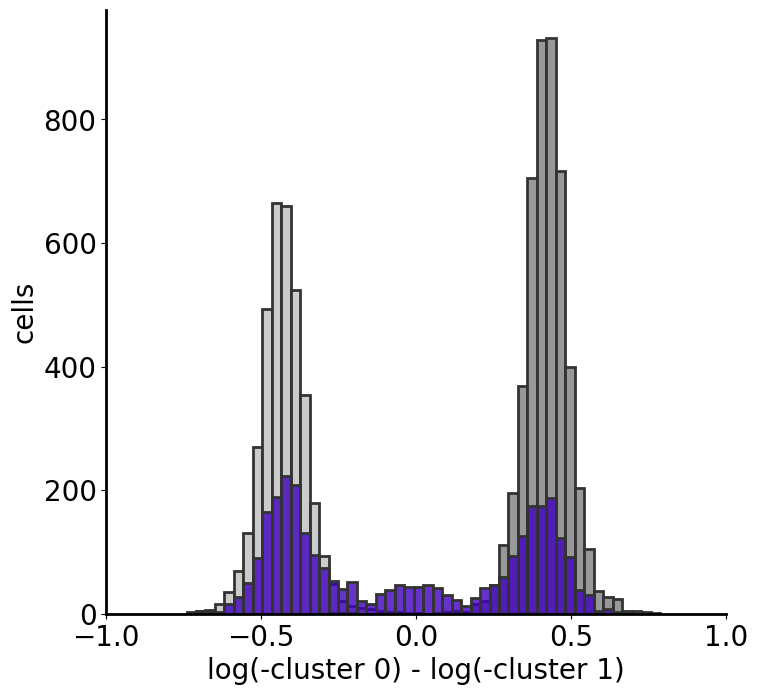

In [47]:
# plot hist of genotypes by donor
for name, df in dfs_3.items():
    
    #plot pca of genotypes
    ax = sns.histplot(data = df,
                      x='logclusterdiff', 
                      bins=50, 
                      hue='Donor',
                      hue_order = ['A+B', 'A','B',],
                      palette = ['#3f00bd',  '#7f7f7f','#bfbfbf'],
                      alpha = 0.8,
                      multiple = 'layer',
                          edgecolor=".2",
                          linewidth = 2
                     )

    #set labels
    ax.set_xlim(xmin= -1, xmax = 1)
    #ax.set_ylim(ymin= 0, ymax = 1600)
    #ax.set(title=name + ' clustered by genotype')
    ax.set_xlabel('log(-cluster 0) - log(-cluster 1)')
    ax.set_ylabel('cells')
    #ax.legend(title='genotype')
    #ax.set(xticklabels=[])
    #ax.tick_params(bottom=False)
    ax.legend(title='Donor', loc='upper center', labels=['A','B','A+B'], frameon = False)
    ax.get_legend().remove()
    
    plt.savefig(
        fig_dir + '221129_PBMC_donor_counts_' + name + '_no_legend.pdf',
        transparent=True,
        bbox_inches='tight',
        #facecolor = 'black'
    )
    plt.show()

In [52]:
df

Sample  \
soup_bc                                                                       
CGGTTCCCATCCAGGAATTACTCGAGGCGAAG-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
ATTGCCGGGTGTATCGCGCTCATTCCTATCCT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
CGGTTCCCCCACCGTTATTACTCGATAGAGGC-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
CAAGAATTTGATTGTTGAATTCGTAGGCGAAG-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
CAAGAATTCGATAGGGATTCAGAACAGGACGT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
...                                                                     ...   
GGCGTCGATGGGCGGTATTCAGAAATAGAGGC-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
CCTCGCAGAGTCCGAGGAATTCGTAGGCGAAG-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TTGACCCTCGTACCAAATTACTCGATAGAGGC-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TTTAATGCCCTGCGGGATTCAGAATATAGCCT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   
TTTCGTCAGGTTCAATATTACTCGTATAGCCT-2  DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527   

                                    TSSEnrichment  ReadsInTSS  \
soup_bc                                                         
CGGTTCCCATCCAGGAATTACTCGAGGCGAAG-2          9.775         232   
ATTGCCGGGTGTATCGCGCTCATTCCTATCCT-2         13.626         289   
CGGTTCCCCCACCGTTATTACTCGATAGAGGC-2          6.661         148   
CAAGAATTTGATTGTTGAATTCGTAGGCGAAG-2          5.492         147   
CAAGAATTCGATAGGGATTCAGAACAGGACGT-2         10.253         233   
...                                           ...         ...   
GGCGTCGATGGGCGGTATTCAGAAATAGAGGC-2          6.761         239   
CCTCGCAGAGTCCGAGGAATTCGTAGGCGAAG-2         10.549         293   
TTGACCCTCGTACCAAATTACTCGATAGAGGC-2          6.362         861   
TTTAATGCCCTGCGGGATTCAGAATATAGCCT-2          7.959         832   
TTTCGTCAGGTTCAATATTACTCGTATAGCCT-2          5.230         206   

                                    ReadsInPromoter  ReadsInBlacklist  \
soup_bc                                                                 
CGGTTCCCATCCAGGAATTACTCGAGGCGAAG-2              248                38   
ATTGCCGGGTGTATCGCGCTCATTCCTATCCT-2              263                60   
CGGTTCCCCCACCGTTATTACTCGATAGAGGC-2              198                58   
CAAGAATTTGATTGTTGAATTCGTAGGCGAAG-2              209                66   
CAAGAATTCGATAGGGATTCAGAACAGGACGT-2              294                74   
...                                             ...               ...   
GGCGTCGATGGGCGGTATTCAGAAATAGAGGC-2              278                35   
CCTCGCAGAGTCCGAGGAATTCGTAGGCGAAG-2              273                22   
TTGACCCTCGTACCAAATTACTCGATAGAGGC-2             1010               195   
TTTAATGCCCTGCGGGATTCAGAATATAGCCT-2              934               232   
TTTCGTCAGGTTCAATATTACTCGTATAGCCT-2              247                48   

                                    PromoterRatio  PassQC  NucleosomeRatio  \
soup_bc                                                                      
CGGTTCCCATCCAGGAATTACTCGAGGCGAAG-2       0.211966       1         6.800000   
ATTGCCGGGTGTATCGCGCTCATTCCTATCCT-2       0.224786       1         4.416667   
CGGTTCCCCCACCGTTATTACTCGATAGAGGC-2       0.169231       1         4.518868   
CAAGAATTTGATTGTTGAATTCGTAGGCGAAG-2       0.179245       1         9.410714   
CAAGAATTCGATAGGGATTCAGAACAGGACGT-2       0.252144       1         2.993151   
...                                           ...     ...              ...   
GGCGTCGATGGGCGGTATTCAGAAATAGAGGC-2       0.222756       1         7.914286   
CCTCGCAGAGTCCGAGGAATTCGTAGGCGAAG-2       0.223039       1         0.243902   
TTGACCCTCGTACCAAATTACTCGATAGAGGC-2       0.190207       1        10.644737   
TTTAATGCCCTGCGGGATTCAGAATATAGCCT-2       0.174710       1        12.102941   
TTTCGTCAGGTTCAATATTACTCGTATAGCCT-2       0.199838       1         2.593023   

                                    nMultiFrags  nMonoFrags  ...  \
soup_bc                                                      ...   
CGGTTCCCATCCAGGAATTACTCGAGGCGAAG-2          136          75  ...   
ATTGCCGGGTGTATCGCGCTCATTCC

In [69]:
soup_pca = df.loc[:, df.columns.str.startswith('cluster')]*-1
soup_pca = (soup_pca/soup_pca.sum(axis = 0).to_numpy())
soup_pca

cluster0  cluster1
soup_bc                                               
CGGTTCCCATCCAGGAATTACTCGAGGCGAAG-2  0.000066  0.000030
ATTGCCGGGTGTATCGCGCTCATTCCTATCCT-2  0.000015  0.000053
CGGTTCCCCCACCGTTATTACTCGATAGAGGC-2  0.000053  0.000030
CAAGAATTTGATTGTTGAATTCGTAGGCGAAG-2  0.000011  0.000039
CAAGAATTCGATAGGGATTCAGAACAGGACGT-2  0.000055  0.000024
...                                      ...       ...
GGCGTCGATGGGCGGTATTCAGAAATAGAGGC-2  0.000068  0.000028
CCTCGCAGAGTCCGAGGAATTCGTAGGCGAAG-2  0.000027  0.000070
TTGACCCTCGTACCAAATTACTCGATAGAGGC-2  0.000174  0.000085
TTTAATGCCCTGCGGGATTCAGAATATAGCCT-2  0.000069  0.000212
TTTCGTCAGGTTCAATATTACTCGTATAGCCT-2  0.000074  0.000032

[11523 rows x 2 columns]

In [61]:
soup_pca.sum(axis = 0)

cluster0    1.301902e+06
cluster1    1.181294e+06
dtype: float64

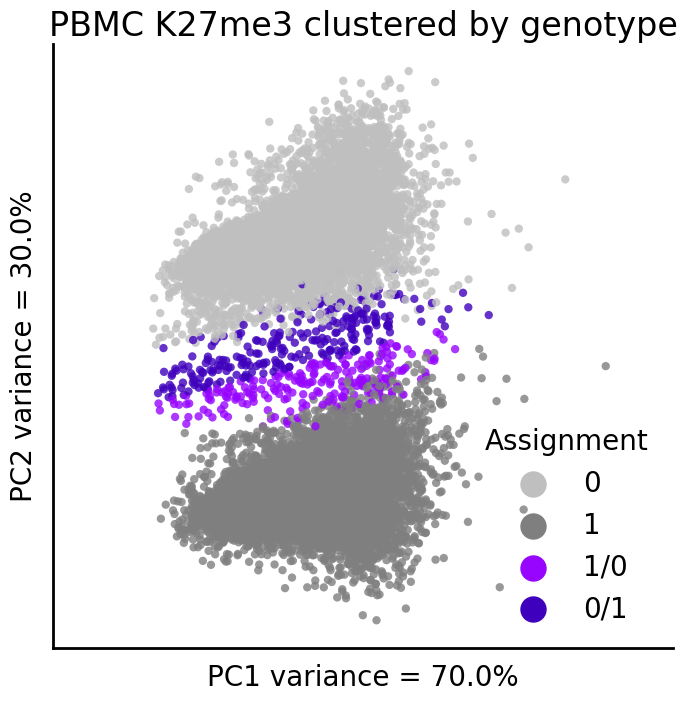

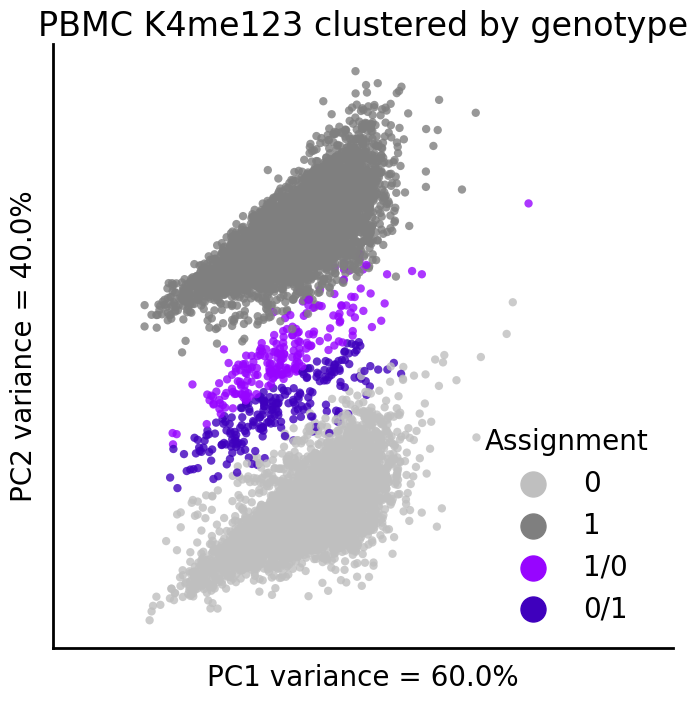

In [70]:
# pca of genotypes by assignment
for name, df in dfs_3.items():

    #prep data
    soup_pca = df.loc[:, df.columns.str.startswith('cluster')]*-1
    soup_pca = (soup_pca/soup_pca.sum(axis = 0).to_numpy())
    soup_pca = soup_pca.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

    #run pca
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(soup_pca)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    
    #label pca
    principalDf.index = df.index
    principalDf['assignment'] = df['assignment']
    principalDf['genotype'] = df['genotype']
    principalDf['Donor'] = df['Donor']
    principalDf['Cells per well'] = df['Cells per well']
    principalDf['Sample name'] = df['Sample name']
    var = pca.explained_variance_ratio_
    
    #plot pca of genotypes
    ax = sns.scatterplot(data=principalDf,
                          x="principal component 1",
                          y="principal component 2",
                          hue='assignment',
                          hue_order = [ '0','1', '1/0','0/1',], 
                          palette = [ '#bfbfbf', '#7f7f7f','#9705ff', '#3f00bd'],
                          alpha = 0.8,
                         edgecolor = 'none')

    #set labels
    ax.set_xlim(xmin= -2, xmax = 3)
    #ax.set_ylim(ymin= -4, ymax = 2)
    xlab = "PC1 variance = " + str(round(var[0], 1)*100) + '%'
    ylab = "PC2 variance = " + str(round(var[1], 1)*100) + '%'
    ax.set(title=name + ' clustered by genotype')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.legend(title='genotype')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.tick_params(bottom=False, left=False)
    ax.legend(title='Assignment', loc='lower right', frameon = False, markerscale=3)
    plt.show()

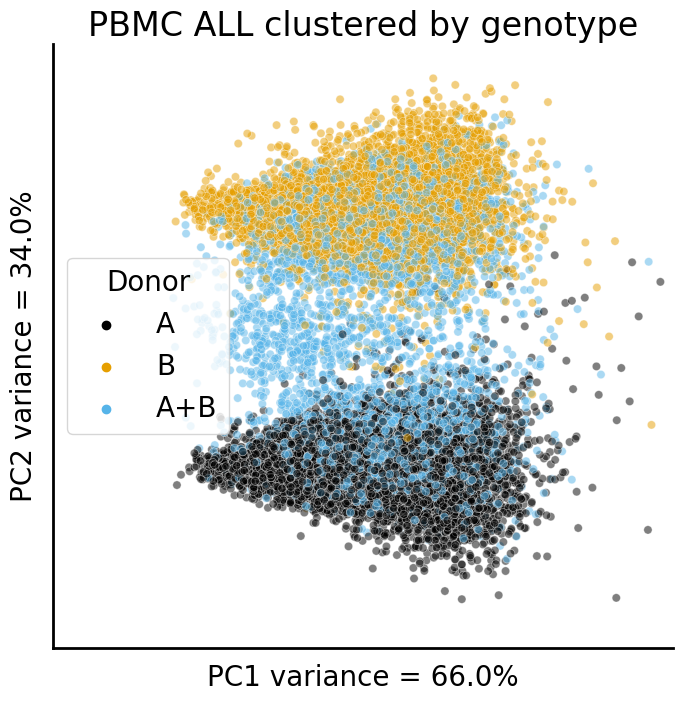

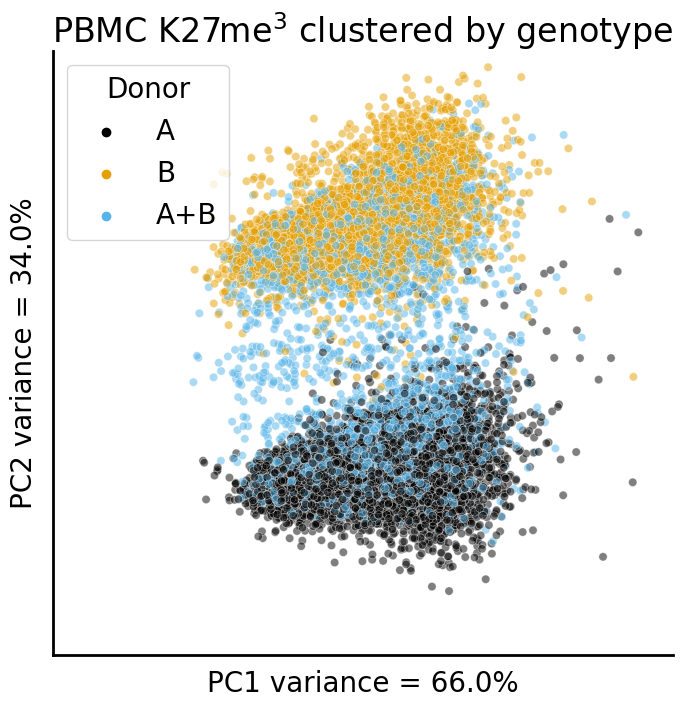

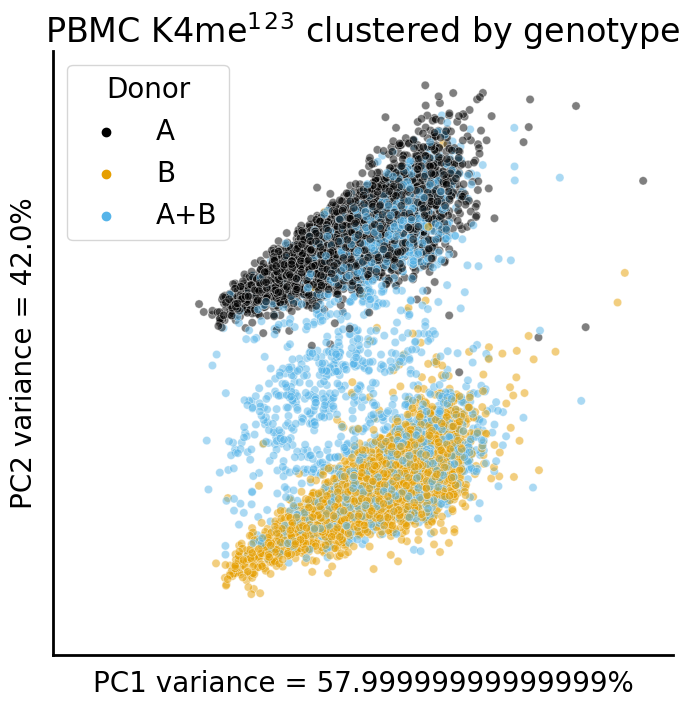

In [311]:
# pca of genotypes by donor
for name, df in dfs_3.items():
    
    #prep data
    soup_pca = df.loc[:, df.columns.str.startswith('cluster')]*-1
    soup_pca = soup_pca.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

    #run pca
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(soup_pca)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    
    #label pca
    principalDf.index = df.index
    principalDf['assignment'] = df['assignment']
    principalDf['genotype'] = df['genotype']
    principalDf['Donor'] = df['Donor']
    principalDf['Cells per well'] = df['Cells per well']
    principalDf['Sample name'] = df['Sample name']
    var = pca.explained_variance_ratio_
    
    #plot pca of genotypes
    ax = sns.scatterplot(data=principalDf,
                          x="principal component 1",
                          y="principal component 2",
                          hue='Donor',
                          hue_order = ['A','B','A+B'],
                          palette = ['#000000', '#e69f00', '#56b4e9'],
                          alpha = 0.5)

    #set labels
    ax.set_xlim(xmin= -2, xmax = 2)
    ax.set_ylim(ymin= -0.7, ymax = 0.7)
    xlab = "PC1 variance = " + str(round(var[0], 2)*100) + '%'
    ylab = "PC2 variance = " + str(round(var[1], 2)*100) + '%'
    ax.set(title=name + ' clustered by genotype')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    #ax.legend(title='genotype')
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.tick_params(bottom=False, left=False)
    plt.show()

# Map genotypes to samples

In [39]:
# rmeove 4cpw
ALL_meta_MERGE[ALL_meta_MERGE['predicted cells/nanowell'] != '4']

genos = ['0','1']
ALL_meta_MERGE['genotype'] = ALL_meta_MERGE['assignment'].apply(lambda i: i if i in genos else 'collision')
ALL_meta_MERGE['genotype'].value_counts()

ALL_meta_MERGE_SUB_0 = ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 10000)]
ALL_meta_MERGE_SUB_1 = ALL_meta_MERGE[(ALL_meta_MERGE['nFrags'] >= 500) & (ALL_meta_MERGE['nFrags'] <= 10000)]
ALL_meta_MERGE_SUB_0['genotype'].value_counts()

dfs_3 = {#'PBMC ALL':ALL_meta_MERGE_SUB_0, 
       'PBMC K27me3':ALL_meta_MERGE_SUB_0[ALL_meta_MERGE_SUB_0['Mark'] == 'K27me3'], 
       'PBMC K4me123':ALL_meta_MERGE_SUB_1[ALL_meta_MERGE_SUB_1['Mark'] == 'K4me123']
      }

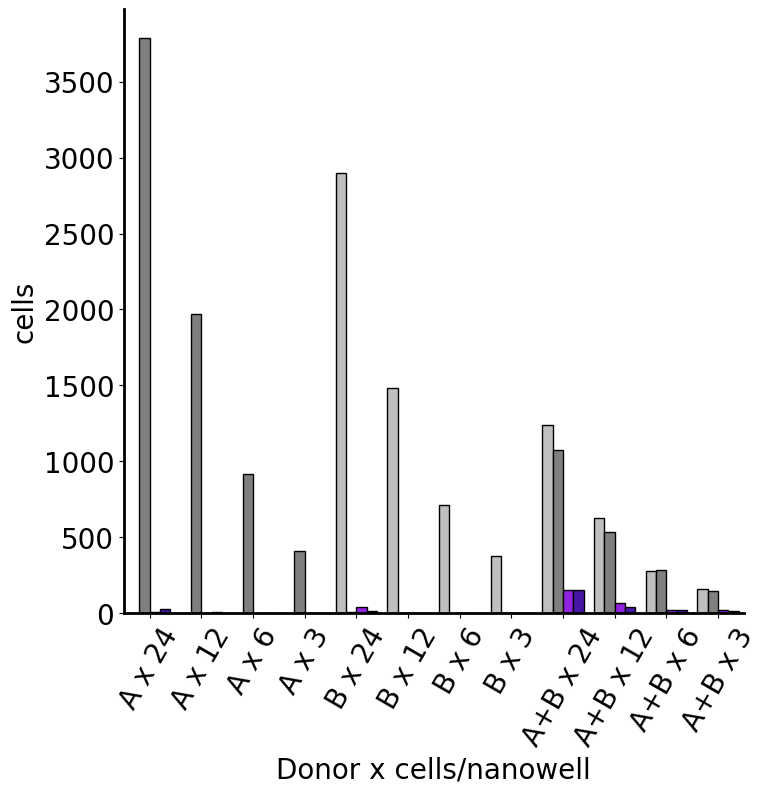

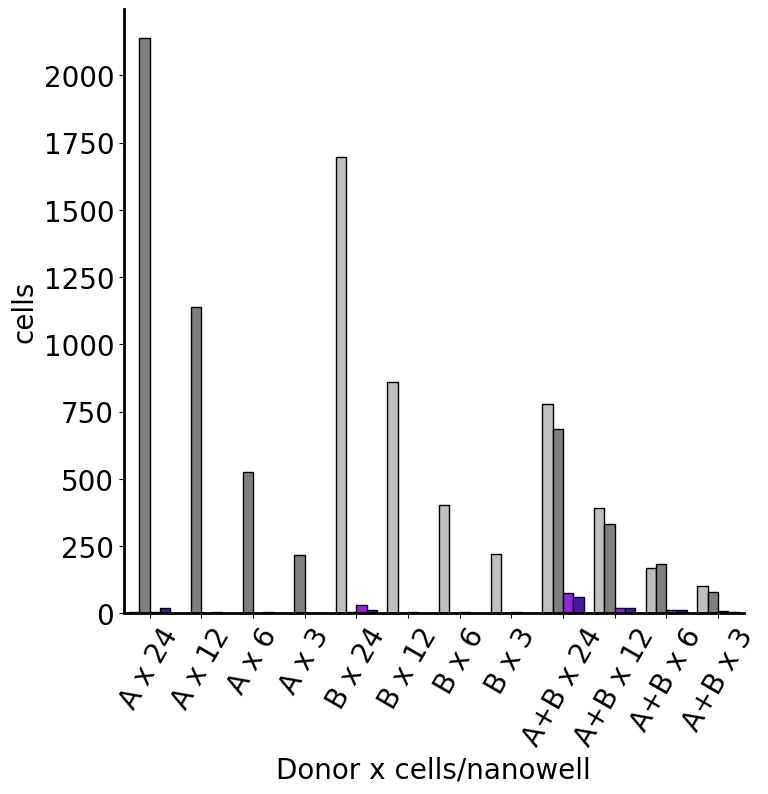

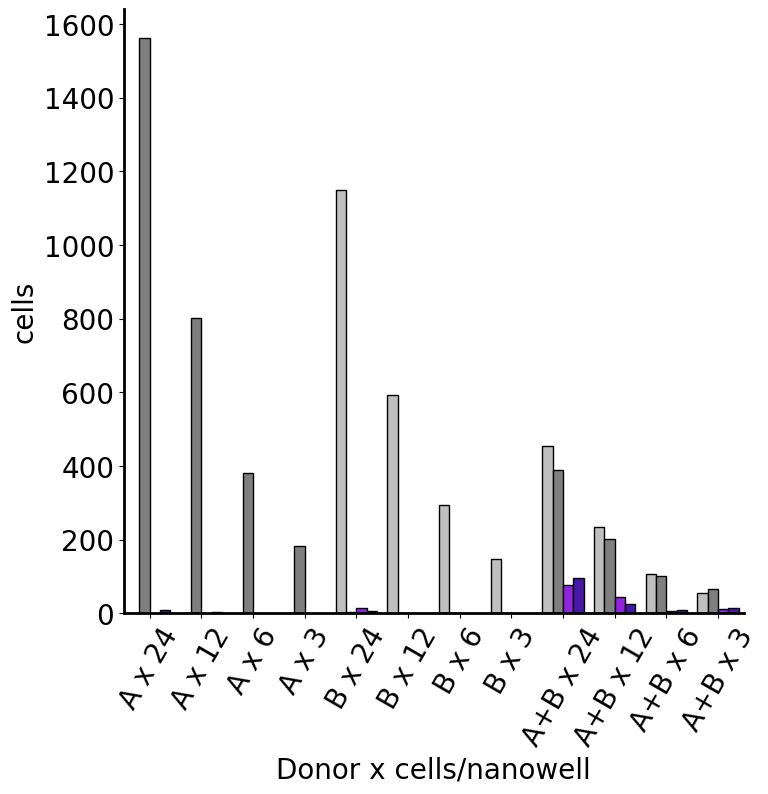

In [71]:
# count cells per assignment per condition

for name, df in dfs_3.items():
   
    # Count assignments by sample (cabs)
    cabs = df.groupby(['Sample name','assignment']).size().reset_index(name='cells')
    cabs = cabs.set_index('Sample name')
    # Count cells per sample (ccps)
    ccps = df['Sample name'].value_counts().reset_index(name='total_cells')
    ccps = ccps.set_index('index')

    #merge
    cabs_MERGE = pd.merge(left = cabs, right = ccps, how = 'left', left_index = True, right_index = True)


    # Calc fraction of assignments per sample
    cabs_MERGE['frac'] = cabs_MERGE['cells']/cabs_MERGE['total_cells'] * 100
    cabs_MERGE = cabs_MERGE.sort_values(by=['total_cells', 'assignment'], ascending=False)
    cabs_MERGE = cabs_MERGE.reset_index()

    # plot it!
    ax = sns.barplot(x="index", 
                       y="cells", 
                       hue="assignment", 
                       data=cabs_MERGE, 
                       hue_order = ['0','1','0/1','1/0'], 
                       order = ['A x 24', 'A x 12', 'A x 6', 'A x 3', 
                                'B x 24', 'B x 12', 'B x 6','B x 3', 
                                'A+B x 24', 'A+B x 12', 'A+B x 6', 'A+B x 3'],
                       palette = [ '#bfbfbf', '#7f7f7f','#9705ff', '#3f00bd'],
                     edgecolor = 'black'
                    )
    #set labels
    #ax.set_ylim(ymin=0, ymax=2000)
    ax.set_xlabel('Donor x cells/nanowell')
    ax.set_ylabel('cells')
    #ax.legend(title='genotype')
    #ax.set(title=name)
    ax.get_legend().remove()
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
    ax.legend(title='Assignment', loc='upper right', frameon = False)
    ax.get_legend().remove()
    plt.show()

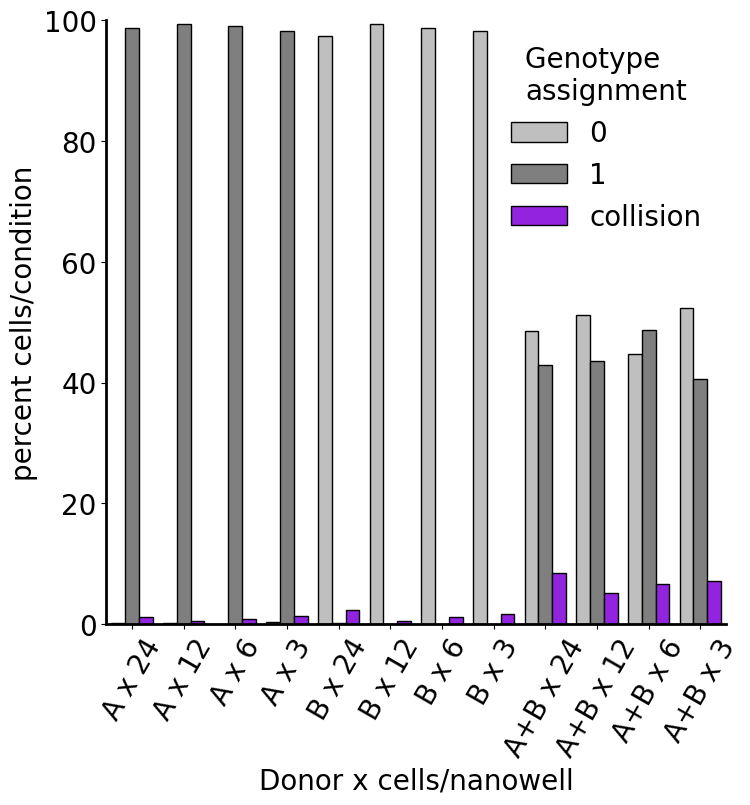

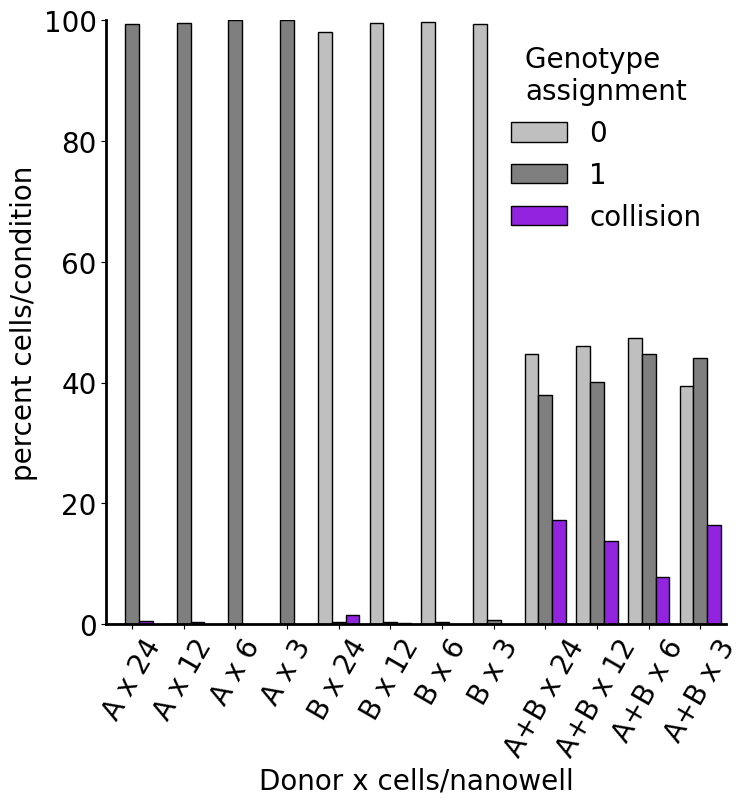

In [52]:
# percent cells/condition per assignment

for name, df in dfs_3.items():
   
    # Count assignments by sample (cabs)
    cabs = df.groupby(['Sample name','genotype']).size().reset_index(name='cells')
    cabs = cabs.set_index('Sample name')
    # Count cells per sample (ccps)
    ccps = df['Sample name'].value_counts().reset_index(name='total_cells')
    ccps = ccps.set_index('index')

    #merge
    cabs_MERGE = pd.merge(left = cabs, right = ccps, how = 'left', left_index = True, right_index = True)


    # Calc fraction of assignments per sample
    cabs_MERGE['frac'] = cabs_MERGE['cells']/cabs_MERGE['total_cells'] * 100
    cabs_MERGE = cabs_MERGE.sort_values(by=['total_cells', 'genotype'], ascending=False)
    cabs_MERGE = cabs_MERGE.reset_index()

    # plot it!
    ax = sns.barplot(x="index", 
                       y="frac", 
                       hue="genotype", 
                       data=cabs_MERGE, 
                       hue_order = ['0','1','collision'], 
                         order = ['A x 24', 'A x 12', 'A x 6', 'A x 3', 
                                'B x 24', 'B x 12', 'B x 6','B x 3', 
                                'A+B x 24', 'A+B x 12', 'A+B x 6', 'A+B x 3'],
                              palette = [ '#bfbfbf', '#7f7f7f','#9705ff'],
                     edgecolor = 'black'
                    )
    
    #set labels
    ax.set_ylim(ymin=0, ymax=100)
    ax.set_xlabel('Donor x cells/nanowell')
    ax.set_ylabel('percent cells/condition')
    #ax.legend(title='genotype')
    #ax.set(title=name)
    ax.get_legend().remove()
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
    ax.legend(title='Genotype \nassignment', loc='upper right', frameon = False)
    #ax.get_legend().remove()
    
    plt.savefig(
        fig_dir + '221129_PBMC_geno_bar_' + name + '.pdf',
        transparent=True,
        bbox_inches='tight',
        #facecolor = 'black'
    )
    plt.show()

In [105]:
#print percent mixed genotypes
for name, df in dfs_3.items():
   
    # Count assignments by sample (cabs)
    cabs = df.groupby(['Sample name','genotype']).size().reset_index(name='Mixed cells')
    cabs = cabs.set_index('Sample name')
    # Count cells per sample (ccps)
    ccps = df['Sample name'].value_counts().reset_index(name='Total cells')
    ccps = ccps.set_index('index')

    #merge
    cabs_MERGE = pd.merge(left = cabs, right = ccps, how = 'left', left_index = True, right_index = True)


    # Calc fraction of genotype per sample
    cabs_MERGE['Percent mixed genotype'] = round(cabs_MERGE['Mixed cells']/cabs_MERGE['Total cells'] * 100, 2)
    cabs_MERGE_MX = cabs_MERGE[cabs_MERGE['genotype'] == 'collision']
    cabs_MERGE_MX = cabs_MERGE_MX.sort_values(by=['Percent mixed genotype'], ascending=False).drop(columns = ['genotype'])
    
    print(name)
    print(cabs_MERGE_MX)
    print('---')

PBMC K27me3
          Mixed cells  Total cells  Percent mixed genotype
A+B x 24          135         1598                    8.45
A+B x 4           157         2005                    7.83
A+B x 3            14          197                    7.11
A+B x 6            25          376                    6.65
A+B x 12           39          761                    5.12
B x 24             41         1743                    2.35
B x 3               4          225                    1.78
A x 3               3          222                    1.35
B x 6               5          408                    1.23
A x 24             25         2167                    1.15
A x 6               5          531                    0.94
A x 12              6         1146                    0.52
B x 12              4          864                    0.46
B x 4              10         2742                    0.36
A x 4               8         2991                    0.27
---
PBMC K4me123
          Mixed cells  Tota

In [50]:
#save singlet cell barcodes

dfs_OUT = {'PBMC_ALL':ALL_meta_MERGE_SUB_0, 
       'PBMC_K27me3':ALL_meta_MERGE_SUB_0[ALL_meta_MERGE_SUB_0['Mark'] == 'K27me3'], 
       'PBMC_K4me123':ALL_meta_MERGE_SUB_0[ALL_meta_MERGE_SUB_0['Mark'] == 'K4me123']
      }

for name, df in dfs_OUT.items():
    
    #all bc
    ALL_bc = df['bed_bc']
    ALL_bc.to_csv(data_dir + name + '_ALL_500to5000_sub61nanowell_barcodes_.tsv', sep = '\t', index = False, header = False)
    
    #singlet bc
    singlet_bc = df[df['genotype'] == 'Single']['bed_bc']
    singlet_bc.to_csv(data_dir + name + '_singlet_500to5000_sub61nanowell_barcodes.tsv', sep = '\t', index = False, header = False)

# Reads/cell distribution plots

In [42]:
#specify data for plotting
ALL_meta_MERGE_no4 = ALL_meta_MERGE[ALL_meta_MERGE['predicted cells/nanowell'] != 4]
dfs_4 = {'PBMC ALL':ALL_meta_MERGE_no4, 
       # 'PBMC K27me3':ALL_meta_MERGE_no4[ALL_meta_MERGE_no4['Mark'] == 'K27me3'], 
       # 'PBMC K4me123':ALL_meta_MERGE_no4[ALL_meta_MERGE_no4['Mark'] == 'K4me123']
      }

/home/jgreene3/.conda/envs/2for1/lib/python3.8/site-packages/seaborn/utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


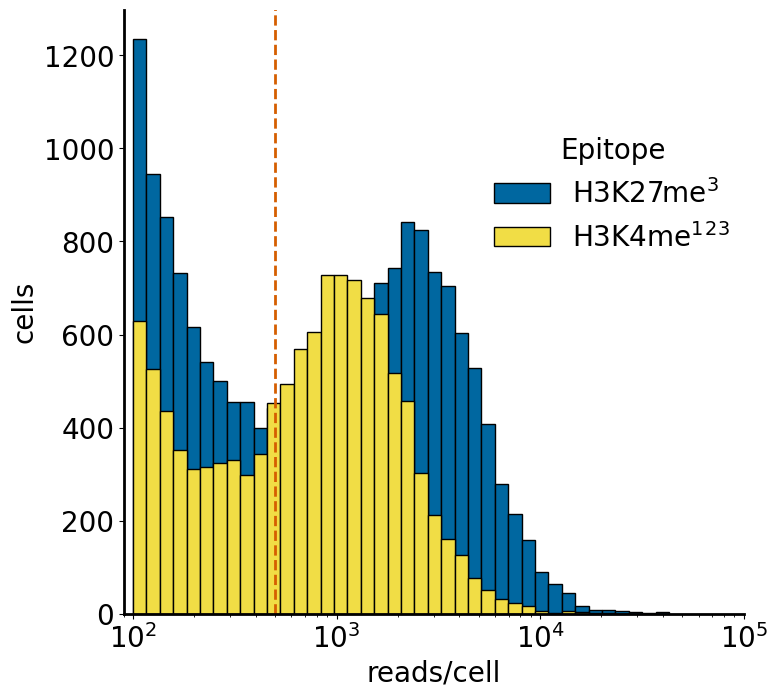

In [49]:
# counts x reads/cell x genotype

for name, df in dfs_4.items():
    
    df.loc[(df['Mark'] == 'K4me123'),'Mark'] = 'H3K4me$^1$$^2$$^3$'
    df.loc[(df['Mark'] == 'K27me3'),'Mark'] = 'H3K27me$^3$'
    
    ax = sns.histplot(data=df, 
                        x="nFrags", 
                        hue="Mark", 
                        multiple="layer",
                        log_scale=True, 
                        palette = [ '#f1dd45', '#0067a0'], 
                        hue_order = [ 'H3K4me$^1$$^2$$^3$', 'H3K27me$^3$'],
                        stat = 'count', 
                        bins = 40,
                      alpha = 1
                     )
    ax.set_xlim(xmin=90, xmax=100000)
    #ax.set_ylim(ymin=0, ymax=1300)
    ax.set_xlabel('reads/cell')
    ax.set_ylabel('cells')
    #ax.set(title=name)
    #ax.set_yscale('log')

    lo,hi = ax.get_ylim()
    lo_cut, hi_cut = 500, 5000

    #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
    #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
    sns.move_legend(
        ax,
        (0.58,0.58),
        title='Epitope', 
        labels=['H3K27me$^3$', 'H3K4me$^1$$^2$$^3$'], 
        frameon = False
    )
    ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', linewidth = 2, label = 'Low threshold')
    #ax.get_legend().remove()
    plt.savefig(
        fig_dir + '221129_PBMC_counts_per_mark.svg',
        transparent=True,
        bbox_inches='tight',
        #facecolor = 'black'
    )
    plt.show()

In [44]:
Frag_sizes = pd.read_csv(data_dir + 'FragmentSizes.csv', index_col=0)

In [45]:
Frag_sizes['Mark'] = Frag_sizes['group'].replace(
    ('DJ_Hs_PBMC_K4me123_ALLSEQ_220523_220527', 'DJ_Hs_PBMC_K27me3_ALLSEQ_220523_220527'), 
    ('H3K4me$^1$$^2$$^3$', 'H3K27me$^3$')
)

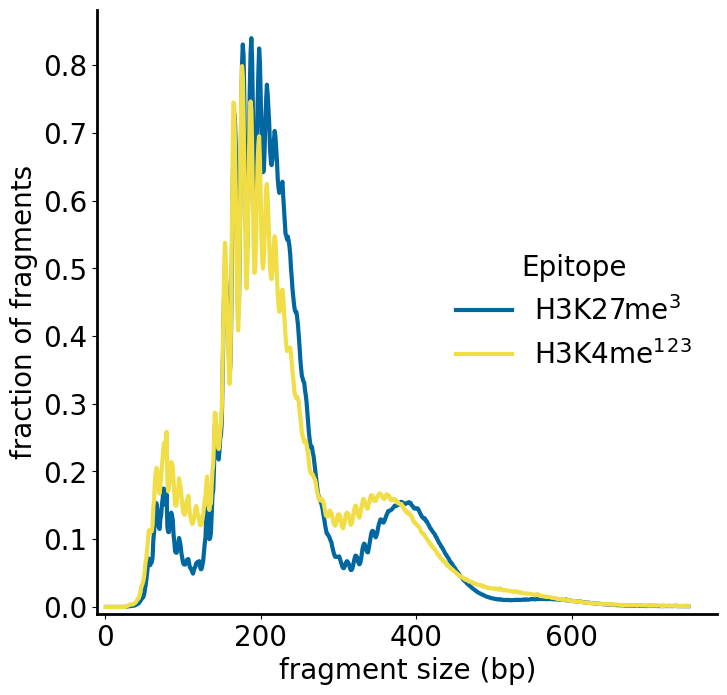

In [47]:
ax = sns.lineplot(data=Frag_sizes, 
            x="fragmentSize", 
            y="fragmentPercent",
            hue="Mark", 
            palette = ['#0067a0', '#f1dd45',], 
            hue_order = ['H3K27me$^3$', 'H3K4me$^1$$^2$$^3$'],
            estimator=None,
            linewidth=3
            )
ax.set_xlim(xmin=-10)
ax.set_ylim(ymin=-0.01)
ax.legend(title='Epitope', loc='center right', labels=['H3K27me$^3$', 'H3K4me$^1$$^2$$^3$'], frameon = False)
ax.set_xlabel('fragment size (bp)')
ax.set_ylabel('fraction of fragments')
#plt.fill_between(Frag_sizes['fragmentSize'], Frag_sizes['fragmentPercent'])
#ax.get_legend().remove()

plt.savefig(
    fig_dir + '221129_PBMC_frag_dist.pdf',
    transparent=True,
    bbox_inches='tight',
    #facecolor = 'black'
)
plt.show()

In [ ]:
# counts x reads/cell x genotype

for name, df in dfs_4.items():
        ax = sns.histplot(data=df, 
                            x="nFrags", 
                            hue="assignment", 
                            element="step",
                            log_scale=True, 
                            palette = [ '#9705ff', '#3f00bd','#bfbfbf', '#7f7f7f'], 
                            hue_order = ['1/0','0/1', '0','1'],
                            stat = 'count', 
                            bins = 30,
                          alpha = 0.8,
                          edgecolor=".2",
                          linewidth = 2
                         )
        ax.set_xlim(xmin=90, xmax=20000)
        ax.set_ylim(ymin=0)
        ax.set_xlabel('reads/cell')
        ax.set_ylabel('cells')
        #ax.set(title=name)
        #ax.set_yscale('log')
        
        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 5000
        #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        ax.legend(title='Genotype assignment', loc='best', labels=[ '0','1','1/0','0/1'], frameon = False)
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', linewidth = 2, label = 'Low threshold')
        # ax.get_legend().remove()
        plt.show()

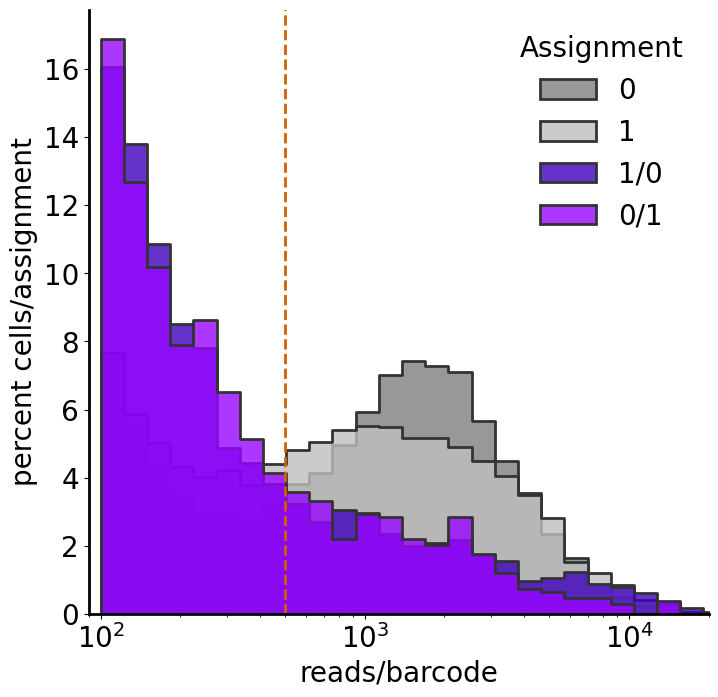

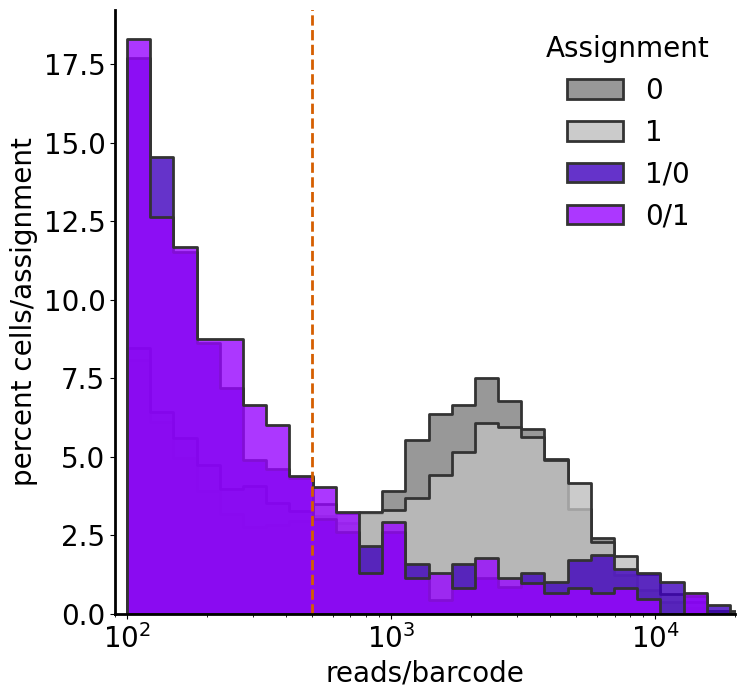

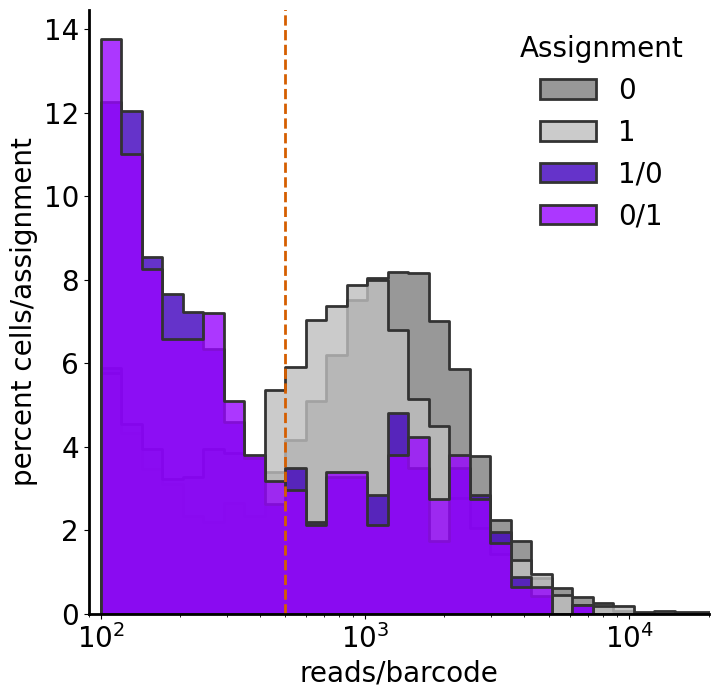

In [96]:
# norm counts x reads/cell x Genotype

for name, df in dfs_4.items():
        ax = sns.histplot(data=df,
                      x="nFrags",
                    hue="assignment", 
                            element="step",
                            log_scale=True, 
                            palette = [ '#9705ff', '#3f00bd','#bfbfbf', '#7f7f7f'], 
                            hue_order = ['1/0','0/1', '0','1'],
                      stat = 'percent',
                      common_norm = False,
                      bins = 30,
                          alpha = 0.8,
                          edgecolor=".2",
                          linewidth = 2
                         )
        ax.set_xlim(xmin=90, xmax=20000)
        #ax.set_ylim(ymin=0, ymax=20)
        ax.set_xlabel('reads/barcode')
        ax.set_ylabel('percent cells/assignment')
        #ax.set(title=name)

        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 5000
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', linewidth = 2, label = 'Low threshold')
        #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        ax.legend(title='Assignment', loc='upper right', labels=[ '0','1','1/0','0/1'], frameon = False)
        #ax.get_legend().remove()
        plt.show()

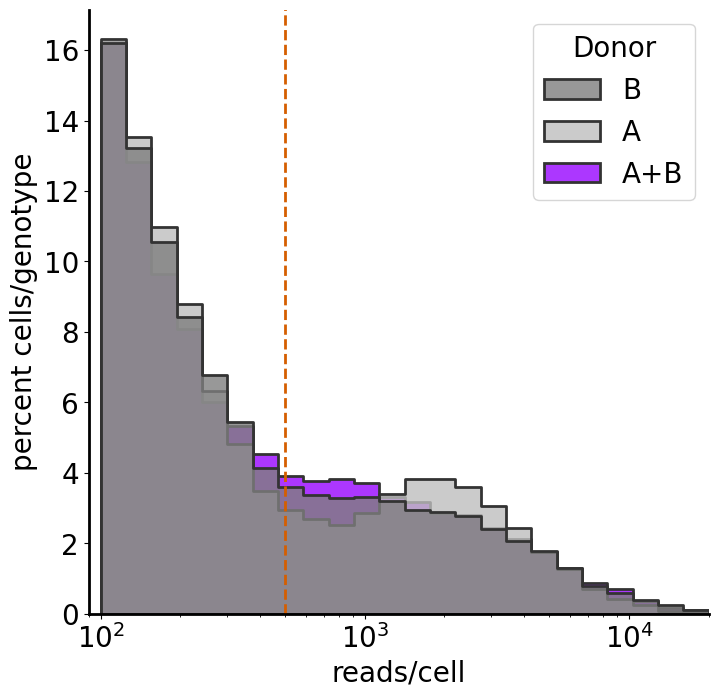

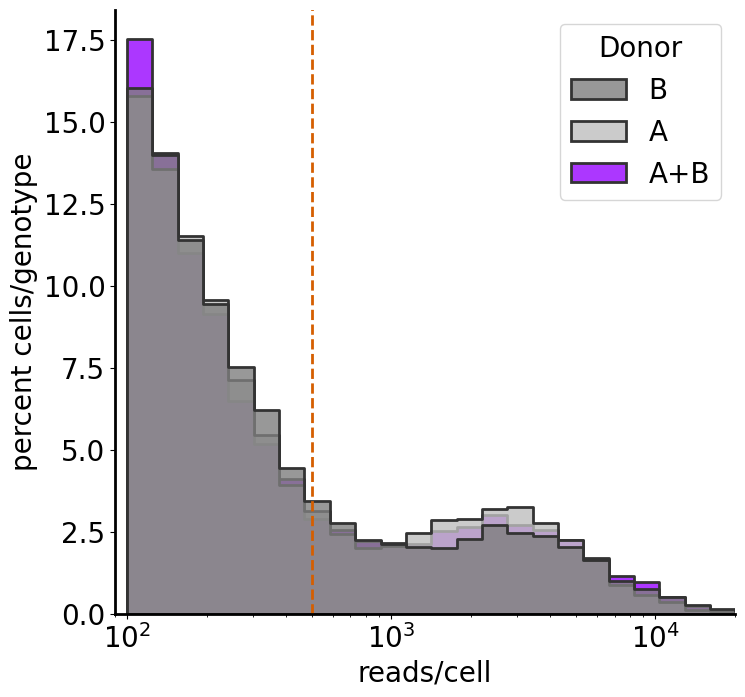

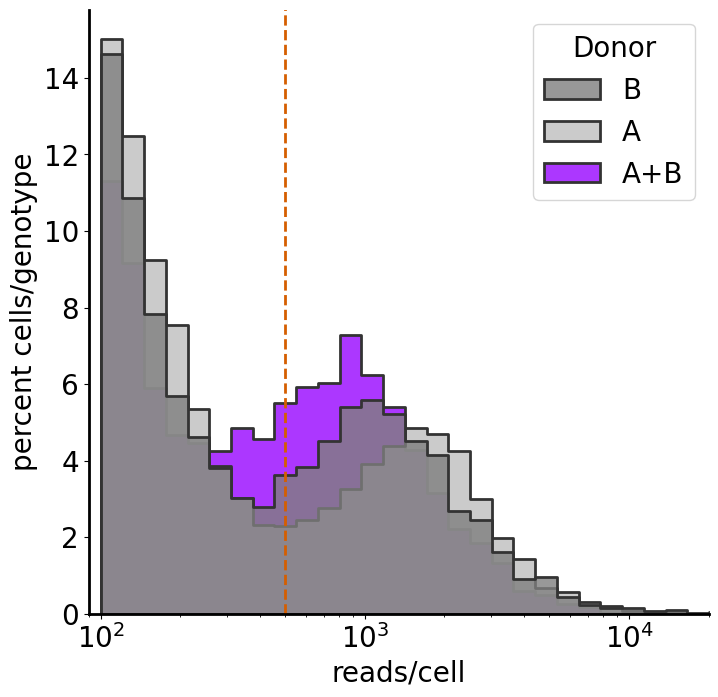

In [270]:
# norm counts x reads/cell x Genotype

for name, df in dfs_4.items():
        ax = sns.histplot(data=df,
                      x="nFrags",
                            element="step",
                            log_scale=True, 
                          hue='Donor',
                          hue_order = ['B','A','A+B'], 
                          palette = ['#7f7f7f', '#bfbfbf', '#9705ff'],
                      stat = 'percent',
                      common_norm = False,
                      bins = 30,
                          alpha = 0.8,
                          edgecolor=".2",
                          linewidth = 2
                         )
        ax.set_xlim(xmin=90, xmax=20000)
        #ax.set_ylim(ymin=0, ymax=20)
        ax.set_xlabel('reads/cell')
        ax.set_ylabel('percent cells/genotype')
        #ax.set(title=name)

        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 5000
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', linewidth = 2, label = 'Low threshold')
        #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        #ax.legend(title='Genotype assignment', loc='upper right', labels=[ '0','1','1/0','0/1'], frameon = False)
        #ax.get_legend().remove()
        plt.show()

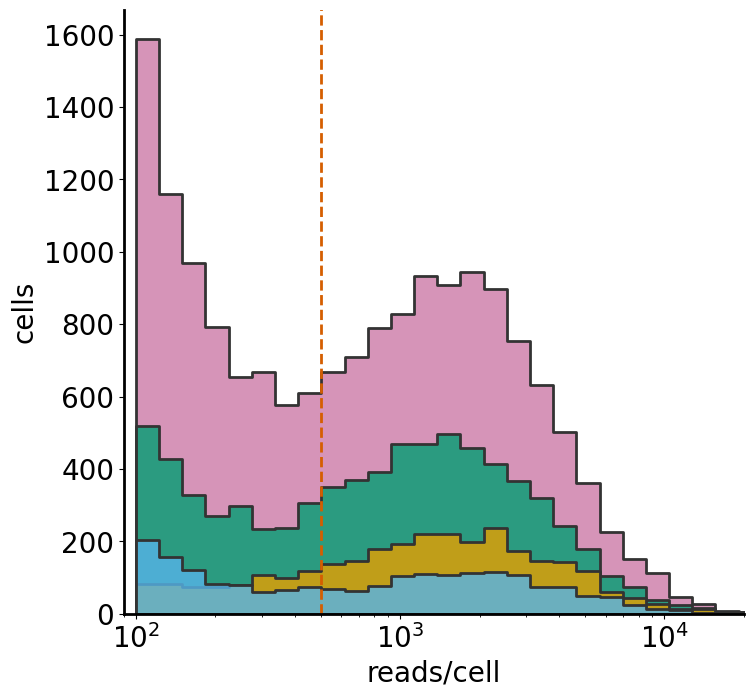

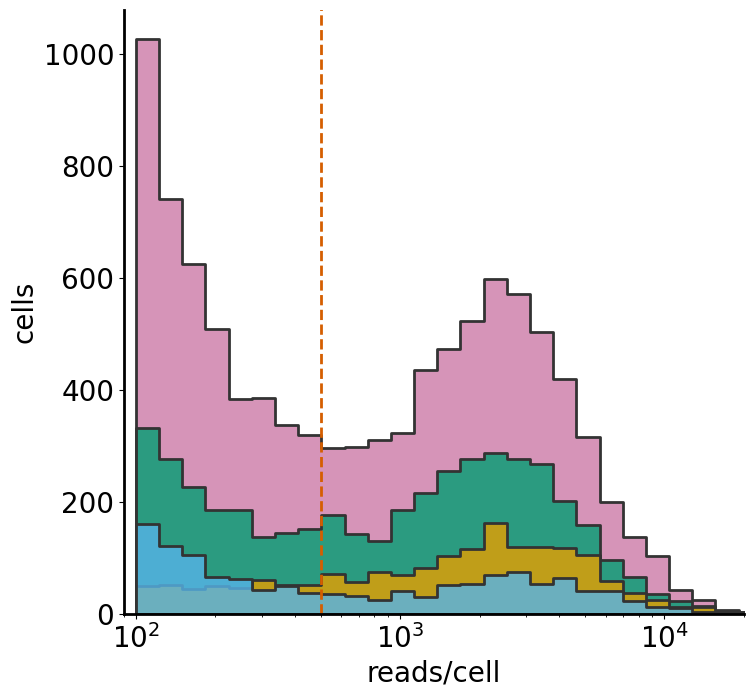

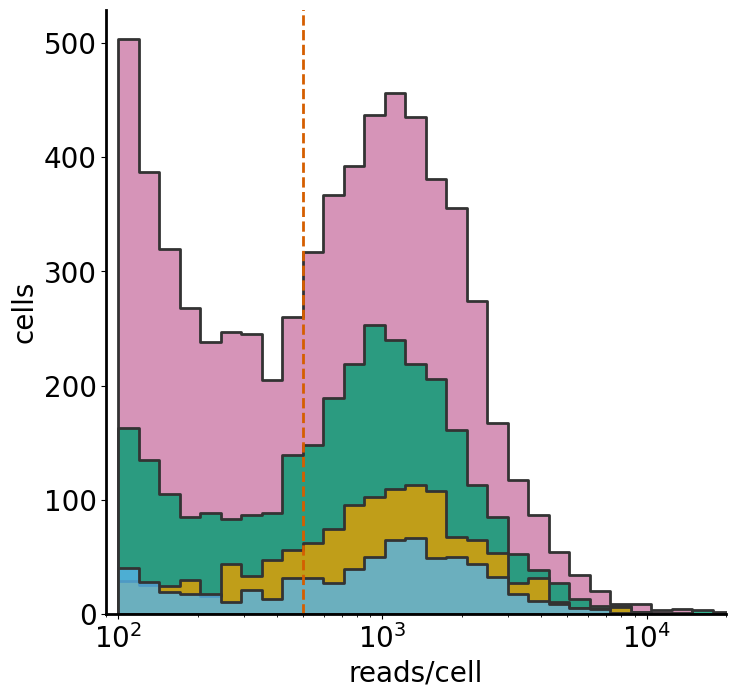

In [105]:
# counts x reads/cell x cells per well

for name, df in dfs_4.items():
        ax = sns.histplot(data=df, 
                          x="nFrags",
                          hue='predicted cells/nanowell',
                          hue_order = [3,6,12,24],
                          palette = ['#56b4e9', '#e69f00', '#009e73', '#CC79A7'], 
                            element="step",
                            log_scale=True,
                            stat = 'count', 
                          bins = 30,
                          alpha = 0.8,
                          edgecolor=".2",
                          linewidth = 2
                         )
        ax.set_xlim(xmin=90,xmax=20000)
        ax.set_ylim(ymin=0)
        ax.set_xlabel('reads/cell')
        ax.set_ylabel('cells')
        #ax.set(title=name)
        #ax.legend(title='Genotype assignment', loc='upper right', labels=[ '3','6','12','24'], frameon = False)

        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 15000
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', linewidth = 2, label = 'Low threshold')
        #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        ax.legend(title='Predicted cells/nanowell', loc='upper right', labels=['24', '12', '6', '3'], frameon = False)
        ax.get_legend().remove()
        plt.show()

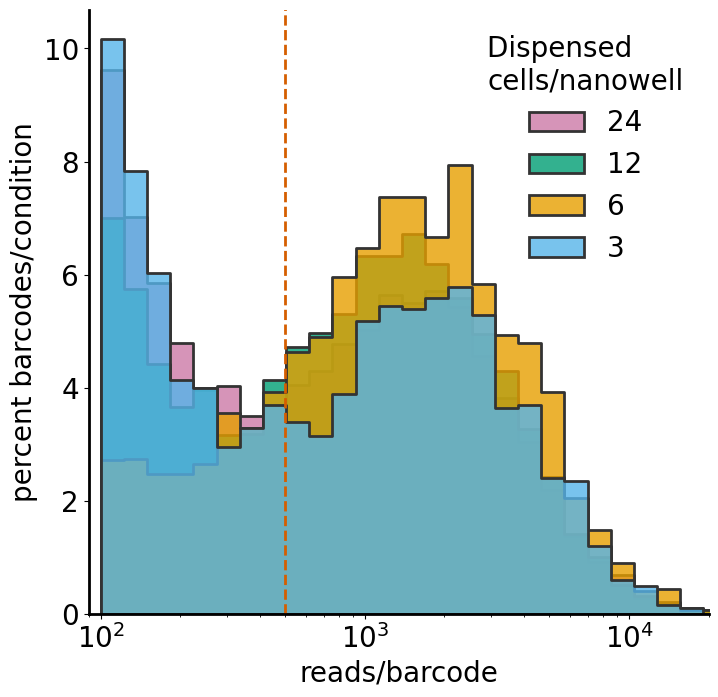

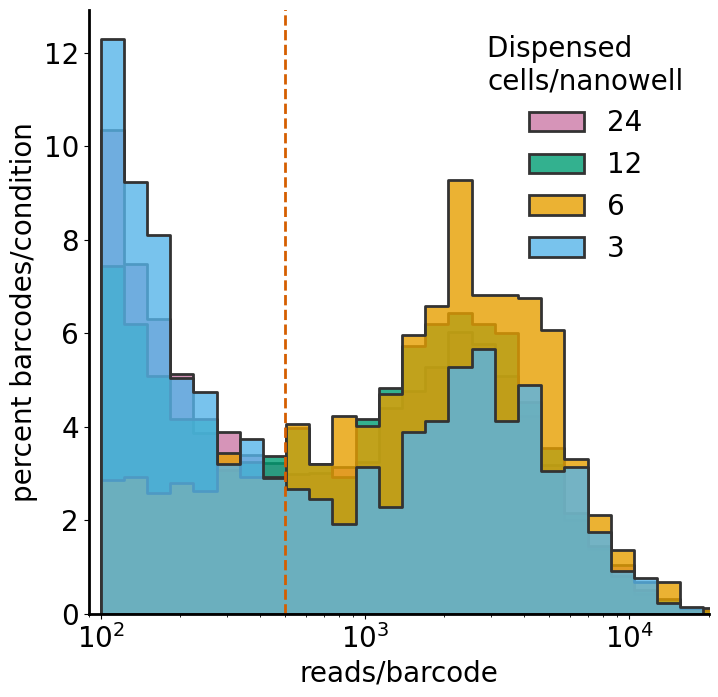

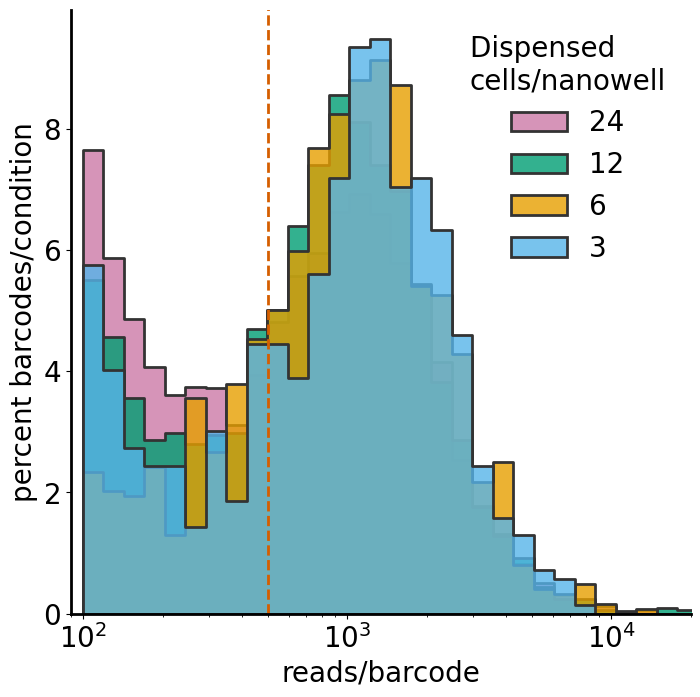

In [110]:
# norm counts x reads/cell x cells per well

for name, df in dfs_4.items():
        ax = sns.histplot(data=df,
                      x="nFrags",
                      hue="predicted cells/nanowell", 
                      element="step",
                      log_scale=True,
                          hue_order = [3,6,12,24],
                    palette = ['#56b4e9', '#e69f00', '#009e73', '#CC79A7'], 
                      stat = 'percent',
                      common_norm = False,
                          bins= 30,
                          alpha = 0.8,
                          edgecolor=".2",
                          linewidth = 2
                         )
        ax.set_xlim(xmin=90, xmax=20000)
        ax.set_ylim(ymin=0)
        ax.set_xlabel('reads/barcode')
        ax.set_ylabel('percent barcodes/condition')
        #ax.set(title=name)
        ax.legend(title='Dispensed \ncells/nanowell', loc='upper right', labels=['24', '12', '6', '3'], frameon = False)

        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 5000
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', label=str(lo_cut), linewidth = 2)
        #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        plt.show()

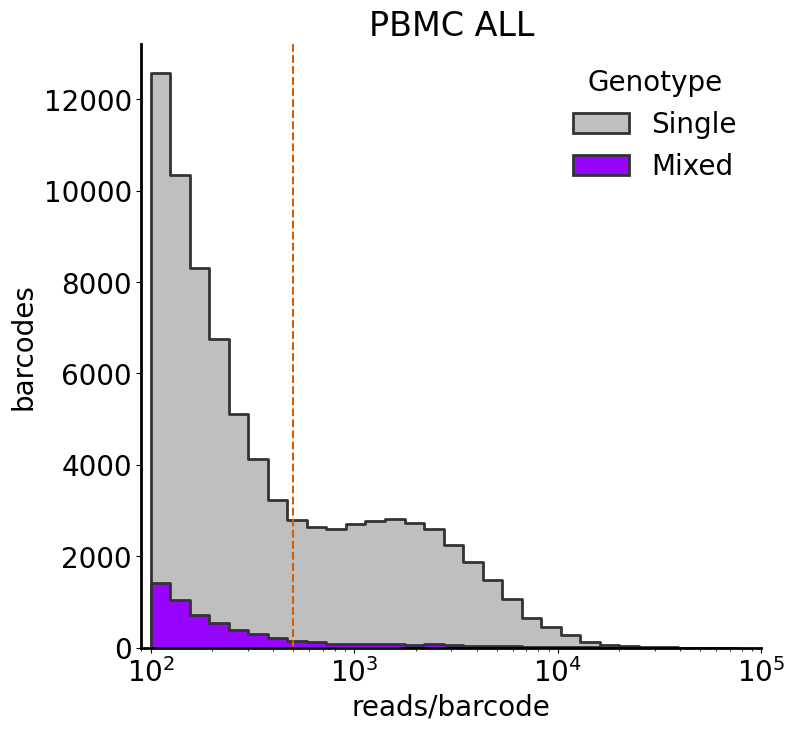

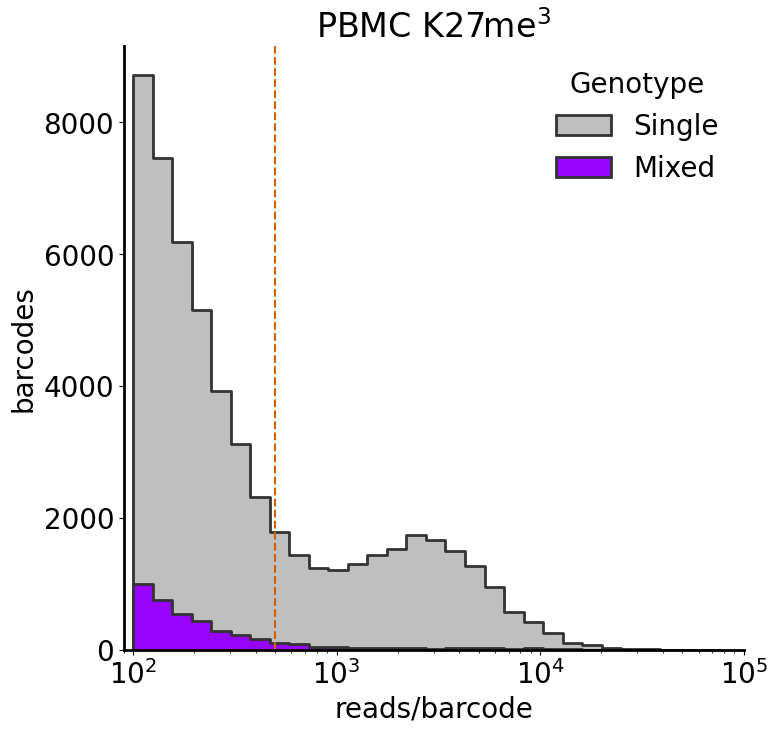

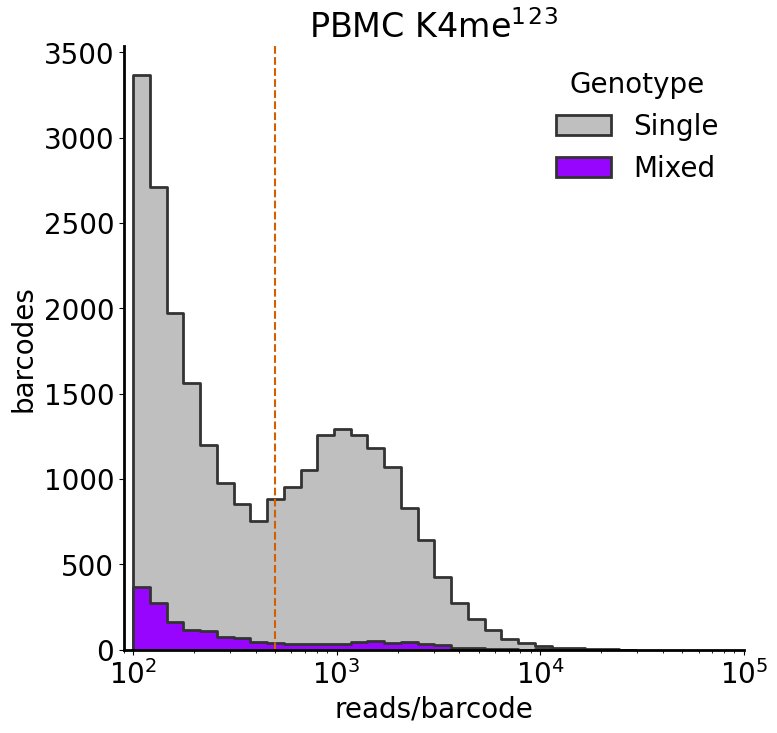

In [295]:
# counts x reads/cell x donor

for name, df in dfs_4.items():
        ax = sns.histplot(data=df, 
                            x="nFrags", 
                            hue="genotype", 
                            element="step",
                            log_scale=True, 
                            palette = ['#9705ff','#bfbfbf'],
                          hue_order = ['Mixed', 'Single'],
                            stat = 'count', 
                            bins = 30,                          
                          alpha = 1,
                          edgecolor=".2",
                          linewidth = 2
                         )
        ax.set_xlim(xmin=90, xmax=100000)
        #ax.set_ylim(ymin=0, ymax=2000)
        ax.set_xlabel('reads/barcode')
        ax.set_ylabel('barcodes')
        ax.set(title=name)

        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 15000
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', label=str(lo_cut))
        #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        ax.legend(title='Genotype', loc='upper right', labels=['Single', 'Mixed'], frameon = False)
        plt.show()

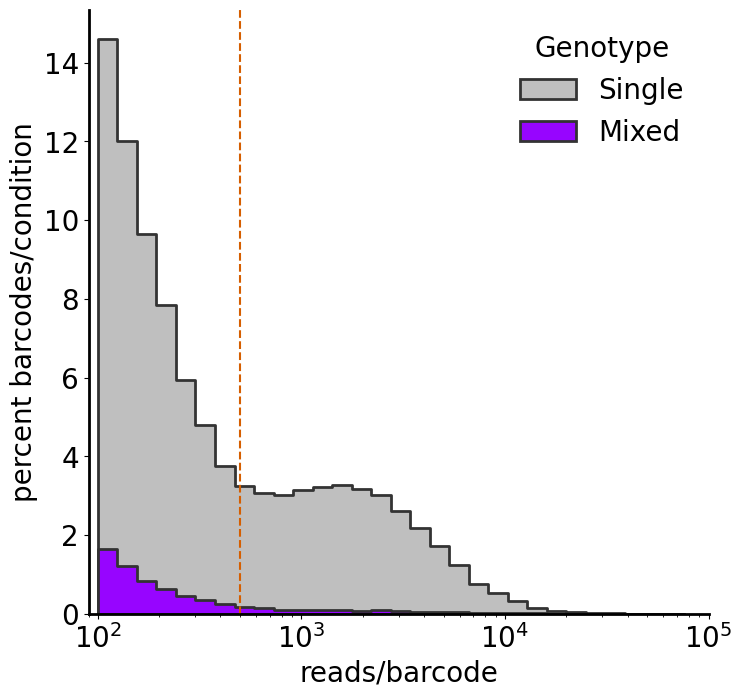

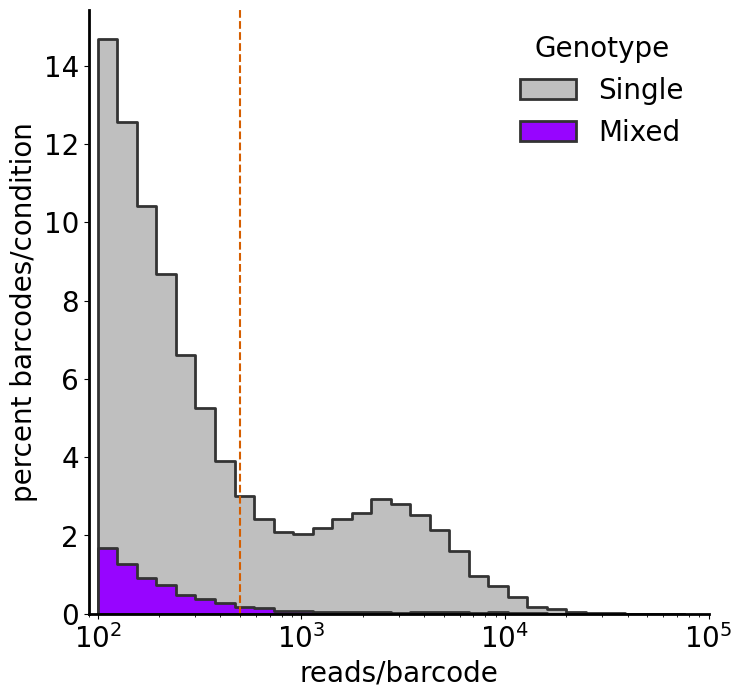

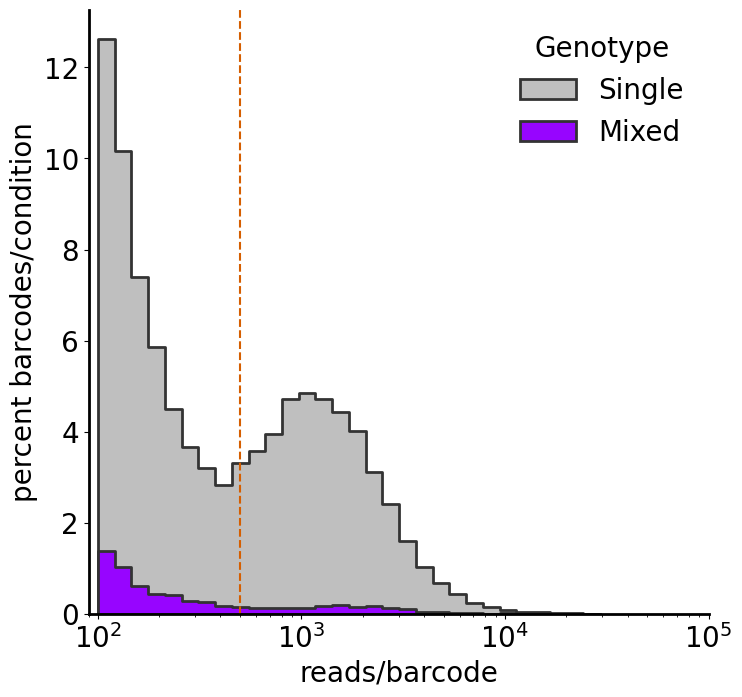

In [296]:
# norm counts x reads/cell x cells per well

for name, df in dfs_4.items():
        ax = sns.histplot(data=df,
                          x="nFrags",
                          hue="genotype", 
                          element="step",
                                  log_scale=True, 
                            palette = ['#9705ff','#bfbfbf'],
                          hue_order = ['Mixed', 'Single'],
                            stat = 'percent', 
                            bins = 30,                          
                          alpha = 1,
                          edgecolor=".2",
                          linewidth = 2
                         )
        ax.set_xlim(xmin=90, xmax=100000)
        #ax.set_ylim(ymin=0, ymax=25)
        ax.set_xlabel('reads/barcode')
        ax.set_ylabel('percent barcodes/condition')
        #ax.set(title=name)

        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 5000
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', label=str(lo_cut))
        #ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        ax.legend(title='Genotype', loc='upper right', labels=['Single', 'Mixed'], frameon = False)
        plt.show()

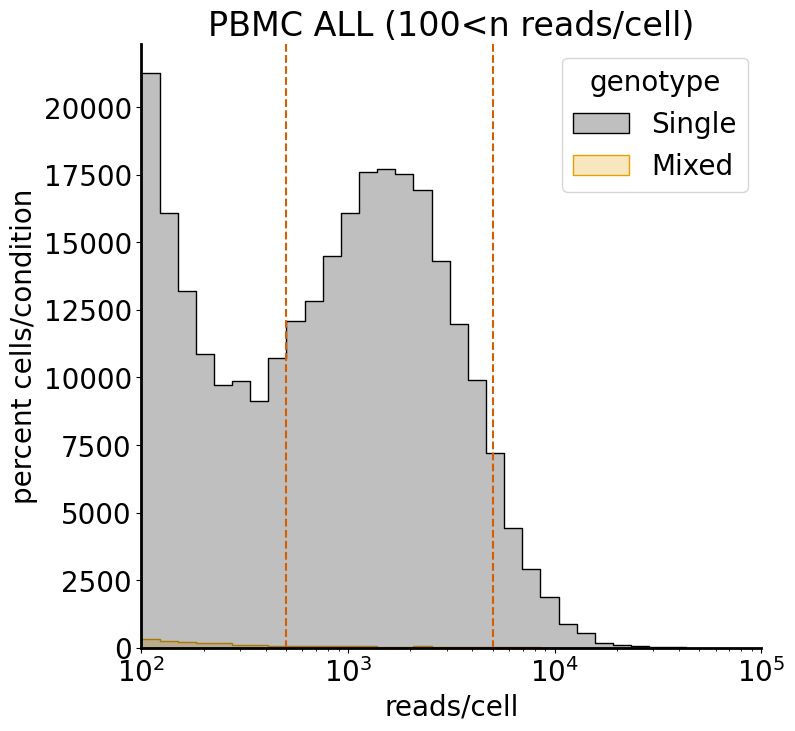

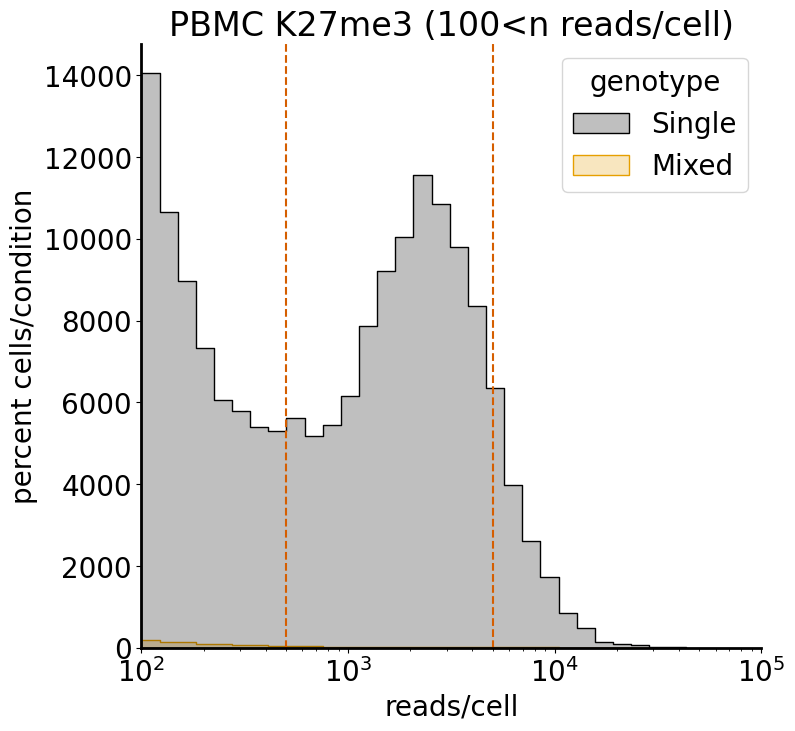

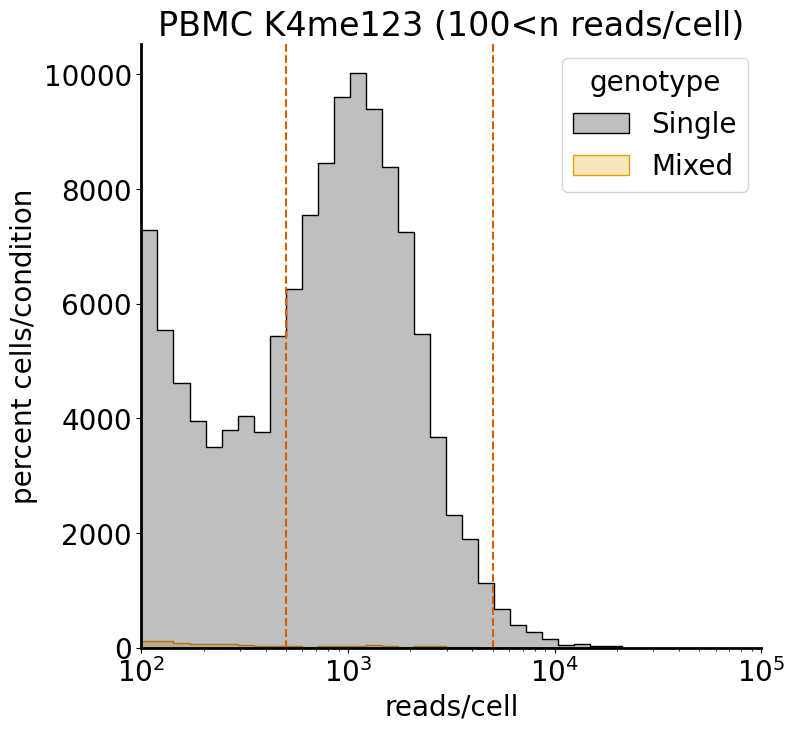

In [64]:
# norm counts x reads/cell x cells per well

for name, df in dfs_4.items():
        ax = sns.histplot(data=df,
                          x="nFrags",
                          hue="genotype", 
                          element="step",
                          log_scale=True, 
                          palette = ['#000000', '#e69f00'],
                      stat = 'frequency',
                      common_norm = True,
                      bins = 30
                         )
        ax.set_xlim(xmin=100, xmax=100000)
        #ax.set_ylim(ymin=0, ymax=25)
        ax.set_xlabel('reads/cell')
        ax.set_ylabel('percent cells/condition')
        ax.set(title=name)

        lo,hi = ax.get_ylim()
        lo_cut, hi_cut = 500, 5000
        ax.axvline(lo_cut, lo, hi, color = '#D55E00', ls = '--', label=str(lo_cut))
        ax.axvline(hi_cut, lo, hi, color = '#D55E00', ls = '--', label=str(hi_cut))
        plt.show()